<a href="https://colab.research.google.com/github/Jirayut053/dataset-rubber/blob/main/Rubber_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **『 การพยากรณ์ปริมาณการผลิตยางพาราในประเทศไทย โดยเทียบกับปัจจัยต่างๆ ที่มีผลกระทบ เพื่อเปรียบเทียบอัลกอริทึมที่ดีที่สุด 』**

ทีมผู้วิจัย


1.   64122250047 นายชัยวัฒน์  อ่อนแย้ม
2.   64122250053 นายจิรายุส  มณีจันสุข

**Github Link - Datasets**
> [Datasets](https://github.com/Jirayut053/dataset-rubber) Click!!!

ชื่อไฟล์ข้อมูลที่ใช้
*   rubber2561_2018.csv.csv
*   rubber2561_2019.csv.csv
*   rubber2561_2020.csv.csv
*   rainfall.csv
*   temp-maxmin.csv

### **นำเข้าไลบรารี่มาใช้งาน (Import Library)**

In [ ]:
#!pip install folium

In [ ]:
#!pip install geopandas

In [ ]:
#!pip install geopy

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
import random

from geopy.geocoders import Nominatim
%matplotlib inline

In [ ]:
from google.colab import files
from google.colab import drive
import requests

In [ ]:
# โหลดข้อมูล GeoJSON for Thailand provinces
geojson_path = "https://raw.githubusercontent.com/chingchai/OpenGISData-Thailand/master/provinces.geojson"
thailand_provinces = gpd.read_file(geojson_path)

In [ ]:
latelong = pd.read_csv('https://raw.githubusercontent.com/Jirayut053/dataset-rubber/main/latelong.csv')
latelong.head()

จังหวัด  ละติจูด  ลองจิจูด
0         กระบี่   8.1781   98.6348
1  กรุงเทพมหานคร  13.7563  100.5018
2      กาญจนบุรี  14.0299   99.5262
3      กาฬสินธุ์  16.4330  103.5090
4      กำแพงเพชร  16.4827   99.5228

In [ ]:
from io import StringIO

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
import math

# Evaluate the models
def evaluate_model(y_true, y_pred, model_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = math.sqrt(mse)
    print(f"Model: {model_name}")
    print(f"R-squared: {round(r2,2)}")
    print(f"Mean Square Error: {round(mse,2)}")
    print(f"Root Mean Square Error: {round(rmse,2)}")
    print("")
    toRe = {
      'modelName' : model_name,
      'r2' : r2,
      'mse' : mse,
      'rmse' : rmse,
    }
    return toRe

##  ข้อมูลปริมาณการผลิตยางพารา (ผลผลิต) 3 ปีย้อนหลัง

> resource: (สำนักงานเศรษฐกิจการเกษตร): https://mis-app.oae.go.th/product/ยางพารา

## เกี่ยวกับข้อมูล
*   Year: ปีที่บันทึกข้อมูล
*   ProvinceName: ชื่อจังหวัด
*   Productivity(tons): ผลผลิต(ตัน)
*   Proportion: สัดส่วน
*   HarvestedArea(rai): เนื้อที่เก็บเกี่ยว(ไร่)
*   Productivity per harvested area(kg.): ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)

ปริมาณการผลิตยางพารา ปี 2562 (2019)

In [ ]:
rubber_2019 = pd.read_csv('https://raw.githubusercontent.com/Jirayut053/dataset-rubber/main/rubber2562_2019.csv')
rubber_2019.head()

ปี        จังหวัด ผลผลิต(ตัน) สัดส่วน เนื้อที่เก็บเกี่ยว(ไร่)  \
0  2019   สุราษฎร์ธานี     508,299     10%               2,055,092   
1  2019          สงขลา     437,091      9%               1,816,227   
2  2019  นครศรีธรรมราช     430,617      9%               1,779,768   
3  2019           ตรัง     292,785      6%               1,195,090   
4  2019           ยะลา     248,844      5%               1,076,871   

   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  
0                            247.34  
1                            240.66  
2                            241.95  
3                            244.99  
4                            231.08

ปริมาณการผลิตยางพารา ปี 2563 (2020)

In [ ]:
rubber_2020 = pd.read_csv('https://raw.githubusercontent.com/Jirayut053/dataset-rubber/main/rubber2563_2020.csv')
rubber_2020.head()

ปี        จังหวัด ผลผลิต(ตัน) สัดส่วน เนื้อที่เก็บเกี่ยว(ไร่)  \
0  2020   สุราษฎร์ธานี     502,618     10%               2,114,568   
1  2020          สงขลา     437,226      9%               1,872,299   
2  2020  นครศรีธรรมราช     412,841      9%               1,777,102   
3  2020           ตรัง     287,114      6%               1,185,411   
4  2020           ยะลา     244,664      5%               1,084,003   

   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  
0                            237.69  
1                            233.52  
2                            232.31  
3                            242.21  
4                            225.70

ปริมาณการผลิตยางพารา ปี 2564(2021)

In [ ]:
rubber_2021 = pd.read_csv('https://raw.githubusercontent.com/Jirayut053/dataset-rubber/main/rubber2564_2021.csv')
rubber_2021.head()

ปี        จังหวัด ผลผลิต(ตัน) สัดส่วน เนื้อที่เก็บเกี่ยว(ไร่)  \
0  2021   สุราษฎร์ธานี     503,812     10%               2,092,517   
1  2021          สงขลา     427,607      9%               1,914,724   
2  2021  นครศรีธรรมราช     418,578      9%               1,770,289   
3  2021           ตรัง     274,171      6%               1,197,161   
4  2021           ยะลา     255,531      5%               1,079,635   

   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  
0                            240.77  
1                            223.33  
2                            236.45  
3                            229.02  
4                            236.68

In [ ]:
print("Rubber Dataset 2019 is shape = ", rubber_2019.shape)
print("Rubber Dataset 2020 is shape = ", rubber_2020.shape)
print("Rubber Dataset 2021 is shape = ", rubber_2021.shape)

Rubber Dataset 2019 is shape =  (69, 6)
Rubber Dataset 2020 is shape =  (69, 6)
Rubber Dataset 2021 is shape =  (67, 6)


##  ข้อมูลปริมาณน้ำฝนประเทศไทย ในแต่ละจังหวัด

> resource: (สถาบันนวัตกรรมและธรรมาภิบาลข้อมูล) https://digi.data.go.th/showcase/thailand-rainfall-data/

## เกี่ยวกับข้อมูล



*   ProvinceID: รหัสจังหวัด
*   ProvinceName: ชื่อจังหวัด(ไทย)
*   ProvinceName 2: ชื่อจังหวัด(อังกฤษ)
*   MinRain: ปริมาณน้ำฝนต่ำสุดต่อเดือน
*   MaxRain: ปริมาณน้ำฝนสูงสุดต่อเดือน
*   AvgRain: ปริมาณน้ำฝนเฉลี่ยต่อเดือน
*   region: ภูมิภาคของประเทศไทย
*   Year: ปีที่บันทึกข้อมูลปริมาณน้ำฝน
*   Month: ลำดับที่ของเดือน
*   Date: วันที่บันทึกข้อมูลปริมาณน้ำฝน
*   Month_TH: ชื่อเดือนไทย

In [ ]:
rainfall_data = pd.read_csv('https://raw.githubusercontent.com/Jirayut053/dataset-rubber/main/rainfall.csv')
rainfall_data

ProvinceID     ProvinceName            ProvinceName 2     MinRain  \
0             10    กรุงเทพมหานคร                   Bangkok   54.299999   
1             11      สมุทรปราการ              Samut Prakan   76.250000   
2             12          นนทบุรี                Nonthaburi   38.360001   
3             13         ปทุมธานี              Pathum Thani   51.439999   
4             14  พระนครศรีอยุธยา  Phra Nakhon Si Ayutthaya    8.850000   
...          ...              ...                       ...         ...   
4230          92             ตรัง                     Trang  158.050003   
4231          93           พัทลุง               Phatthalung  101.309998   
4232          94          ปัตตานี                   Pattani  127.589996   
4233          95             ยะลา                      Yala  122.440002   
4234          96         นราธิวาส                Narathiwat  146.039993   

         MaxRain     AvgRain region  Year  Month    Date  Month_TH  
0     257.230011  142.119137   กลาง  2018      1  1/1/18    มกราคม  
1     256.100006  137.302046   กลาง  2018      1  1/1/18    มกราคม  
2     161.470001  113.433771   กลาง  2018      1  1/1/18    มกราคม  
3     116.500000   82.901688   กลาง  2018      1  1/1/18    มกราคม  
4      88.589996   39.960089   กลาง  2018      1  1/1/18    มกราคม  
...          ...         ...    ...   ...    ...     ...       ...  
4230  433.649994  293.423136    ใต้  2022      7  1/7/22  กรกฎาคม   
4231  264.140015  144.777569    ใต้  2022      7  1/7/22  กรกฎาคม   
4232  214.440002  172.280939    ใต้  2022      7  1/7/22  กรกฎาคม   
4233  189.169998  148.495964    ใต้  2022      7  1/7/22  กรกฎาคม   
4234  238.490005  197.770666    ใต้  2022      7  1/7/22  กรกฎาคม   

[4235 rows x 11 columns]

In [ ]:
rainfall_data.shape

(4235, 11)

##  ข้อมูลอุณหภูมิสูงสุดและต่ำสุดรายเดือนของแต่ละจังหวัดทั่วประเทศ
> resource: (สำนักงานพัฒนารัฐบาลดิจิทัล (องค์การมหาชน) (สพร.), data.go.th): https://data.go.th/th/dataset/tmax-tmin


ข้อมูลอุณหภูมิสูงสุดและต่ำสุดรายเดือนของแต่ละจังหวัดทั่วประเทศ ที่ผ่านการวิเคราะห์จากข้อมูลรายสถานี โดยใช้วิธีการทางสถิติ โดยใช้หน่วยวัดเป็น องศาเซลเซียส ( ํC)

## เกี่ยวกับข้อมูล
ข้อมูลอุณหภูมิสูงสุดและต่ำสุดรายเดือนของแต่ละจังหวัดทั่วประเทศ
*   id: ลำดับข้อมูล
*   Year: ปีที่บันทึกข้อมูลอุณหภูมิ
*   Month: ลำดับที่ของเดือน
*   ProvinceID: รหัสจังหวัด
*   ProvinceName: ชื่อจังหวัด
*   Tmax: อุณหภูมิสูงสุด
*   Tmin: อุณหภูมิต่ำสุด

In [ ]:
tmax_tmin_data = pd.read_csv('https://raw.githubusercontent.com/Jirayut053/dataset-rubber/main/tmax-tmin.csv')
tmax_tmin_data

/usr/local/lib/python3.10/dist-packages/IPython/core/displayhook.py:275: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  warn('Output cache limit (currently {sz} entries) hit.\n'


Year  Month  ProvinceID     ProvinceName  Tmax  Tmin
0     2018      1          10    กรุงเทพมหานคร  35.5  18.0
1     2018      1          11      สมุทรปราการ  36.0  18.4
2     2018      1          13         ปทุมธานี  35.6  18.0
3     2018      1          14  พระนครศรีอยุธยา  35.5  15.4
4     2018      1          16           ลพบุรี  36.2  14.7
...    ...    ...         ...              ...   ...   ...
4480  2023      9          92             ตรัง  33.7  23.5
4481  2023      9          93           พัทลุง  34.9  24.0
4482  2023      9          94          ปัตตานี  35.4  23.7
4483  2023      9          95             ยะลา  35.1  23.4
4484  2023      9          96         นราธิวาส  34.8  23.3

[4485 rows x 6 columns]

In [ ]:
tmax_tmin_data.shape

(4485, 6)

## **การกลั่นกรองข้อมูล**

### ตรวจสอบความผิดปกติของข้อมูลปริมาณการผลิตยางพาราในเบื้องต้น

In [ ]:
rubber_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ปี                                69 non-null     int64  
 1   จังหวัด                           69 non-null     object 
 2   ผลผลิต(ตัน)                       69 non-null     object 
 3   สัดส่วน                           69 non-null     object 
 4   เนื้อที่เก็บเกี่ยว(ไร่)           69 non-null     object 
 5   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  69 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ KB


In [ ]:
rubber_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ปี                                69 non-null     int64  
 1   จังหวัด                           69 non-null     object 
 2   ผลผลิต(ตัน)                       69 non-null     object 
 3   สัดส่วน                           69 non-null     object 
 4   เนื้อที่เก็บเกี่ยว(ไร่)           69 non-null     object 
 5   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  69 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.4+ KB


In [ ]:
rubber_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ปี                                67 non-null     int64  
 1   จังหวัด                           67 non-null     object 
 2   ผลผลิต(ตัน)                       67 non-null     object 
 3   สัดส่วน                           67 non-null     object 
 4   เนื้อที่เก็บเกี่ยว(ไร่)           67 non-null     object 
 5   ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  67 non-null     float64
dtypes: float64(1), int64(1), object(4)
memory usage: 3.3+ KB


### นำชุดข้อมูลปริมาณการผลิตยางพาราทั้ง 3 ปี มาต่อเข้าด้วยกัน เป็นชุดข้อมูลเดียวกัน

In [ ]:
rubber_all = pd.concat([rubber_2019,
                        rubber_2020, rubber_2021],
                        ignore_index=True)
rubber_all

ปี        จังหวัด ผลผลิต(ตัน) สัดส่วน เนื้อที่เก็บเกี่ยว(ไร่)  \
0    2019   สุราษฎร์ธานี     508,299     10%               2,055,092   
1    2019          สงขลา     437,091      9%               1,816,227   
2    2019  นครศรีธรรมราช     430,617      9%               1,779,768   
3    2019           ตรัง     292,785      6%               1,195,090   
4    2019           ยะลา     248,844      5%               1,076,871   
..    ...            ...         ...     ...                     ...   
200  2021        สระบุรี         242      0%                   1,906   
201  2021     แม่ฮ่องสอน         137      0%                   1,024   
202  2021         ลพบุรี         110      0%                   1,149   
203  2021        นครนายก          95      0%                     541   
204  2021         นครปฐม           1      0%                      10   

     ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)  
0                              247.34  
1                              240.66  
2                              241.95  
3                              244.99  
4                              231.08  
..                                ...  
200                            126.97  
201                            133.79  
202                             95.74  
203                            175.60  
204                            100.00  

[205 rows x 6 columns]

### **ตรวจสอบความผิดปกติของข้อมูลปริมาณ น้ำฝน และอุณหภูมิ ในเบื้องต้น**

In [ ]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      4235 non-null   int64  
 1   ProvinceName    4235 non-null   object 
 2   ProvinceName 2  4235 non-null   object 
 3   MinRain         4235 non-null   float64
 4   MaxRain         4235 non-null   float64
 5   AvgRain         4235 non-null   float64
 6   region          4235 non-null   object 
 7   Year            4235 non-null   int64  
 8   Month           4235 non-null   int64  
 9   Date            4235 non-null   object 
 10  Month_TH        4235 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 364.1+ KB


In [ ]:
tmax_tmin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          4485 non-null   int64  
 1   Month         4485 non-null   int64  
 2   ProvinceID    4485 non-null   int64  
 3   ProvinceName  4485 non-null   object 
 4   Tmax          4485 non-null   float64
 5   Tmin          4460 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 210.4+ KB


## เปลี่ยนชื่อ column ใหม่ให้สอดคล้องกับชุดข้อมูลอื่น

In [ ]:
rubber_all.rename(columns = {'ปี':'Year', 'จังหวัด':'ProvinceName',
                             'ผลผลิต(ตัน)':'Prod', 'สัดส่วน':'Prop',
                             'เนื้อที่เก็บเกี่ยว(ไร่)':'HarvArea',
                             'ผลผลิตต่อเนื้อที่เก็บเกี่ยว(กก.)':'ProdPerHarvArea'},
                             inplace = True)
rubber_all

Year   ProvinceName     Prod Prop   HarvArea  ProdPerHarvArea
0    2019   สุราษฎร์ธานี  508,299  10%  2,055,092           247.34
1    2019          สงขลา  437,091   9%  1,816,227           240.66
2    2019  นครศรีธรรมราช  430,617   9%  1,779,768           241.95
3    2019           ตรัง  292,785   6%  1,195,090           244.99
4    2019           ยะลา  248,844   5%  1,076,871           231.08
..    ...            ...      ...  ...        ...              ...
200  2021        สระบุรี      242   0%      1,906           126.97
201  2021     แม่ฮ่องสอน      137   0%      1,024           133.79
202  2021         ลพบุรี      110   0%      1,149            95.74
203  2021        นครนายก       95   0%        541           175.60
204  2021         นครปฐม        1   0%         10           100.00

[205 rows x 6 columns]

In [ ]:
latelong.rename(columns = {'จังหวัด':'ProvinceName',
                             'ละติจูด':'ละติจูด', 'ลองจิจูด':'ลองจิจูด'},
                             inplace = True)
latelong

ProvinceName  ละติจูด  ลองจิจูด
0          กระบี่   8.1781   98.6348
1   กรุงเทพมหานคร  13.7563  100.5018
2       กาญจนบุรี  14.0299   99.5262
3       กาฬสินธุ์  16.4330  103.5090
4       กำแพงเพชร  16.4827   99.5228
..            ...      ...       ...
89       อุดรธานี  17.4041  102.7896
90      อุตรดิตถ์  17.6310  100.0970
91      อุทัยธานี  15.3789  100.0245
92    อุบลราชธานี  15.2286  104.8560
93      กาญจนบุรี  14.0299   99.5262

[94 rows x 3 columns]

### แปลงข้อมูล จาก object เป็น numerical

In [ ]:
# แปลงคอลัมน์เป็น string ก่อนลบเครื่องหมาย ',' และแปลงเป็น float
rubber_all['Prod'] = rubber_all['Prod'].astype(str).str.replace(',', '').astype(float)
rubber_all['HarvArea'] = rubber_all['HarvArea'].astype(str).str.replace(',', '').astype(float)
rubber_all['ProdPerHarvArea'] = rubber_all['ProdPerHarvArea'].astype(str).str.replace(',', '').astype(float)

In [ ]:
rubber_all.dtypes

Year                 int64
ProvinceName        object
Prod               float64
Prop                object
HarvArea           float64
ProdPerHarvArea    float64
dtype: object

In [ ]:
rubber_all

Year   ProvinceName      Prod Prop   HarvArea  ProdPerHarvArea
0    2019   สุราษฎร์ธานี  508299.0  10%  2055092.0           247.34
1    2019          สงขลา  437091.0   9%  1816227.0           240.66
2    2019  นครศรีธรรมราช  430617.0   9%  1779768.0           241.95
3    2019           ตรัง  292785.0   6%  1195090.0           244.99
4    2019           ยะลา  248844.0   5%  1076871.0           231.08
..    ...            ...       ...  ...        ...              ...
200  2021        สระบุรี     242.0   0%     1906.0           126.97
201  2021     แม่ฮ่องสอน     137.0   0%     1024.0           133.79
202  2021         ลพบุรี     110.0   0%     1149.0            95.74
203  2021        นครนายก      95.0   0%      541.0           175.60
204  2021         นครปฐม       1.0   0%       10.0           100.00

[205 rows x 6 columns]

## **ชุดข้อมูลอุณหภูมิ**

### ตรวจสอบข้อมูลอุณหภูมิสูงสุดต่ำสุด

In [ ]:
tmax_tmin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4485 entries, 0 to 4484
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          4485 non-null   int64  
 1   Month         4485 non-null   int64  
 2   ProvinceID    4485 non-null   int64  
 3   ProvinceName  4485 non-null   object 
 4   Tmax          4485 non-null   float64
 5   Tmin          4460 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 210.4+ KB


** พบว่า ข้อมูลอุณหภูมิใน column Tmin เป็นค่า null ไป 25 จุด **

### แทนค่า Null ด้วย Mean ของ Tmin

In [ ]:
mean_val = tmax_tmin_data['Tmin'].mean()
mean_val

20.37206278026906

In [ ]:
tmax_tmin_data['Tmin'].fillna(mean_val, inplace=True)
tmax_tmin_data

Year  Month  ProvinceID     ProvinceName  Tmax  Tmin
0     2018      1          10    กรุงเทพมหานคร  35.5  18.0
1     2018      1          11      สมุทรปราการ  36.0  18.4
2     2018      1          13         ปทุมธานี  35.6  18.0
3     2018      1          14  พระนครศรีอยุธยา  35.5  15.4
4     2018      1          16           ลพบุรี  36.2  14.7
...    ...    ...         ...              ...   ...   ...
4480  2023      9          92             ตรัง  33.7  23.5
4481  2023      9          93           พัทลุง  34.9  24.0
4482  2023      9          94          ปัตตานี  35.4  23.7
4483  2023      9          95             ยะลา  35.1  23.4
4484  2023      9          96         นราธิวาส  34.8  23.3

[4485 rows x 6 columns]

### ตรวจสอบค่า Null ของข้อมูลอุณหภูมิว่ายังมีค่า Null อยู่อีกหรือไม่

In [ ]:
tmax_tmin_data.isnull().sum()

Year            0
Month           0
ProvinceID      0
ProvinceName    0
Tmax            0
Tmin            0
dtype: int64

### หาค่าเฉลี่ยอุณหภูมิ ระหว่างอุณหภูมิสูงสุดกับอุณหภูมิต่ำสุด

In [ ]:
tmax_tmin_data['AvgTemp'] = (tmax_tmin_data['Tmax'] + tmax_tmin_data['Tmin']) / 2
tmax_tmin_data

Year  Month  ProvinceID     ProvinceName  Tmax  Tmin  AvgTemp
0     2018      1          10    กรุงเทพมหานคร  35.5  18.0    26.75
1     2018      1          11      สมุทรปราการ  36.0  18.4    27.20
2     2018      1          13         ปทุมธานี  35.6  18.0    26.80
3     2018      1          14  พระนครศรีอยุธยา  35.5  15.4    25.45
4     2018      1          16           ลพบุรี  36.2  14.7    25.45
...    ...    ...         ...              ...   ...   ...      ...
4480  2023      9          92             ตรัง  33.7  23.5    28.60
4481  2023      9          93           พัทลุง  34.9  24.0    29.45
4482  2023      9          94          ปัตตานี  35.4  23.7    29.55
4483  2023      9          95             ยะลา  35.1  23.4    29.25
4484  2023      9          96         นราธิวาส  34.8  23.3    29.05

[4485 rows x 7 columns]

### เลือกข้อมูลอุณหภูมิตั้งแต่ปี 2019 - 2021

In [ ]:
# ตัดชุดข้อมูล เอาข้อมูลตั้งแต่มี ค.ศ.2018 - 2020
tmax_tmin_data_cut = tmax_tmin_data[(tmax_tmin_data['Year'] >= 2019) &
                                    (tmax_tmin_data['Year'] <= 2021)]
tmax_tmin_data_cut

Year  Month  ProvinceID     ProvinceName  Tmax  Tmin  AvgTemp
780   2019      1          10    กรุงเทพมหานคร  37.3  18.7    28.00
781   2019      1          11      สมุทรปราการ  32.2  23.9    28.05
782   2019      1          13         ปทุมธานี  36.5  20.0    28.25
783   2019      1          14  พระนครศรีอยุธยา  36.5  18.5    27.50
784   2019      1          16           ลพบุรี  35.8  16.2    26.00
...    ...    ...         ...              ...   ...   ...      ...
3115  2021     12          92             ตรัง  34.1  22.3    28.20
3116  2021     12          93           พัทลุง  32.4  22.0    27.20
3117  2021     12          94          ปัตตานี  32.7  21.8    27.25
3118  2021     12          95             ยะลา  33.5  21.4    27.45
3119  2021     12          96         นราธิวาส  32.2  22.0    27.10

[2340 rows x 7 columns]

### รวมกลุ่มข้อมูลอุณหภูมิจากรายเดือนเป็นรายปี ตาม ปี และ จังหวัด และหาผลรวมของค่าเฉลี่ยอุณหภูมิ

In [ ]:
grouped_tmax_tmin = tmax_tmin_data_cut.groupby(
                    ['Year','ProvinceID','ProvinceName']
                    )['AvgTemp','Tmax','Tmin'].sum().reset_index()
grouped_tmax_tmin['AvgTemp'] = grouped_tmax_tmin['AvgTemp'] / 12
grouped_tmax_tmin['Tmax'] = grouped_tmax_tmin['Tmax'] / 12
grouped_tmax_tmin['Tmin'] = grouped_tmax_tmin['Tmin'] / 12
grouped_tmax_tmin

<ipython-input-7808-4cfc8898b750>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_tmax_tmin = tmax_tmin_data_cut.groupby(


Year  ProvinceID     ProvinceName    AvgTemp       Tmax       Tmin
0    2019          10    กรุงเทพมหานคร  30.095833  37.608333  22.583333
1    2019          11      สมุทรปราการ  28.541667  33.125000  23.958333
2    2019          13         ปทุมธานี  30.562500  38.308333  22.816667
3    2019          14  พระนครศรีอยุธยา  29.262500  37.200000  21.325000
4    2019          16           ลพบุรี  29.137500  38.350000  19.925000
..    ...         ...              ...        ...        ...        ...
190  2021          92             ตรัง  28.712500  35.166667  22.258333
191  2021          93           พัทลุง  28.520833  34.500000  22.541667
192  2021          94          ปัตตานี  28.666667  34.833333  22.500000
193  2021          95             ยะลา  28.654167  35.408333  21.900000
194  2021          96         นราธิวาส  28.232169  34.308333  22.156005

[195 rows x 6 columns]

In [ ]:
grouped_tmax_tmin.shape

(195, 6)

## **ชุดข้อมูลปริมาณน้ำฝน**

### ตรวจสอบข้อมูลปริมาณน้ำฝน

In [ ]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4235 entries, 0 to 4234
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProvinceID      4235 non-null   int64  
 1   ProvinceName    4235 non-null   object 
 2   ProvinceName 2  4235 non-null   object 
 3   MinRain         4235 non-null   float64
 4   MaxRain         4235 non-null   float64
 5   AvgRain         4235 non-null   float64
 6   region          4235 non-null   object 
 7   Year            4235 non-null   int64  
 8   Month           4235 non-null   int64  
 9   Date            4235 non-null   object 
 10  Month_TH        4235 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 364.1+ KB


### เลือกข้อมูลปริมาณน้ำฝนตั้งแต่ปี 2019 - 2021

In [ ]:
# ตัดชุดข้อมูล เอาข้อมูลตั้งแต่มี ค.ศ.2019 - 2021
rainfall_data_cut = rainfall_data[(rainfall_data['Year'] >= 2019) & (rainfall_data['Year'] <= 2021)]
rainfall_data_cut

ProvinceID     ProvinceName            ProvinceName 2     MinRain  \
924           10    กรุงเทพมหานคร                   Bangkok    0.630000   
925           11      สมุทรปราการ              Samut Prakan    0.000000   
926           12          นนทบุรี                Nonthaburi    0.570000   
927           13         ปทุมธานี              Pathum Thani    0.330000   
928           14  พระนครศรีอยุธยา  Phra Nakhon Si Ayutthaya    0.000000   
...          ...              ...                       ...         ...   
3691          92             ตรัง                     Trang   55.889999   
3692          93           พัทลุง               Phatthalung  134.649994   
3693          94          ปัตตานี                   Pattani  197.309998   
3694          95             ยะลา                      Yala  205.910004   
3695          96         นราธิวาส                Narathiwat  306.679993   

         MaxRain     AvgRain region  Year  Month     Date Month_TH  
924     3.100000    1.051604   กลาง  2019      1   1/1/19   มกราคม  
925     3.220000    1.107001   กลาง  2019      1   1/1/19   มกราคม  
926     1.030000    0.874765   กลาง  2019      1   1/1/19   มกราคม  
927     0.880000    0.752263   กลาง  2019      1   1/1/19   มกราคม  
928     0.790000    0.424286   กลาง  2019      1   1/1/19   มกราคม  
...          ...         ...    ...   ...    ...      ...      ...  
3691  243.660004  114.582382    ใต้  2021     12  1/12/21  ธันวาคม  
3692  263.739990  198.607832    ใต้  2021     12  1/12/21  ธันวาคม  
3693  369.010010  267.461684    ใต้  2021     12  1/12/21  ธันวาคม  
3694  344.429993  294.671922    ใต้  2021     12  1/12/21  ธันวาคม  
3695  399.579987  350.374872    ใต้  2021     12  1/12/21  ธันวาคม  

[2772 rows x 11 columns]

### รวมกลุ่มข้อมูลปริมาณน้ำฝนจากรายเดือนเป็นรายปี ตาม ปี, รหัสจังหวัด, ชื่อจังหวัด และ ภูมิภาค และหาผลรวมของค่าเฉลี่ยน้ำฝน

In [ ]:
grouped_rainfall = rainfall_data_cut.groupby(['Year','ProvinceID','ProvinceName','region'])['AvgRain','MaxRain','MinRain'].sum().reset_index()
grouped_rainfall['AvgRain'] = grouped_rainfall['AvgRain'] / 12
grouped_rainfall['MaxRain'] = grouped_rainfall['MaxRain'] / 12
grouped_rainfall['MinRain'] = grouped_rainfall['MinRain'] / 12
grouped_rainfall

<ipython-input-7812-efb5770b1afa>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_rainfall = rainfall_data_cut.groupby(['Year','ProvinceID','ProvinceName','region'])['AvgRain','MaxRain','MinRain'].sum().reset_index()


Year  ProvinceID     ProvinceName region     AvgRain     MaxRain  \
0    2019          10    กรุงเทพมหานคร   กลาง   80.435937  120.587500   
1    2019          11      สมุทรปราการ   กลาง   78.815797  112.879168   
2    2019          12          นนทบุรี   กลาง   78.607464   97.545833   
3    2019          13         ปทุมธานี   กลาง   76.349294  111.141666   
4    2019          14  พระนครศรีอยุธยา   กลาง   60.750673   89.498335   
..    ...         ...              ...    ...         ...         ...   
226  2021          92             ตรัง    ใต้  190.088900  294.456666   
227  2021          93           พัทลุง    ใต้  174.842118  250.683331   
228  2021          94          ปัตตานี    ใต้  168.229246  250.808335   
229  2021          95             ยะลา    ใต้  189.371158  245.540831   
230  2021          96         นราธิวาส    ใต้  189.016665  245.058330   

        MinRain  
0     47.604167  
1     46.070001  
2     59.130834  
3     56.481667  
4     37.458333  
..          ...  
226  113.788332  
227  113.889165  
228  115.818332  
229  142.121667  
230  143.862500  

[231 rows x 7 columns]

In [ ]:
grouped_rainfall.shape

(231, 7)

In [ ]:
rubber_all.columns

Index(['Year', 'ProvinceName', 'Prod', 'Prop', 'HarvArea', 'ProdPerHarvArea'], dtype='object')

In [ ]:
grouped_rainfall.columns

Index(['Year', 'ProvinceID', 'ProvinceName', 'region', 'AvgRain', 'MaxRain',
       'MinRain'],
      dtype='object')

In [ ]:
grouped_tmax_tmin.columns

Index(['Year', 'ProvinceID', 'ProvinceName', 'AvgTemp', 'Tmax', 'Tmin'], dtype='object')

## ผสานชุดข้อมูลปริมาณน้ำฝนกับชุดข้อมูลอุณหภูมิเข้าด้วยกัน

In [ ]:
# รวมชุดข้อมูลโดยใช้เมธอด merge และ group ตามชื่อจังหวัด
merged_rainfall_temp = grouped_rainfall.merge(grouped_tmax_tmin, on=['Year','ProvinceID','ProvinceName'])
merged_rainfall_temp

Year  ProvinceID     ProvinceName region     AvgRain     MaxRain  \
0    2019          10    กรุงเทพมหานคร   กลาง   80.435937  120.587500   
1    2019          11      สมุทรปราการ   กลาง   78.815797  112.879168   
2    2019          13         ปทุมธานี   กลาง   76.349294  111.141666   
3    2019          14  พระนครศรีอยุธยา   กลาง   60.750673   89.498335   
4    2019          16           ลพบุรี   กลาง   75.614520  119.986668   
..    ...         ...              ...    ...         ...         ...   
190  2021          92             ตรัง    ใต้  190.088900  294.456666   
191  2021          93           พัทลุง    ใต้  174.842118  250.683331   
192  2021          94          ปัตตานี    ใต้  168.229246  250.808335   
193  2021          95             ยะลา    ใต้  189.371158  245.540831   
194  2021          96         นราธิวาส    ใต้  189.016665  245.058330   

        MinRain    AvgTemp       Tmax       Tmin  
0     47.604167  30.095833  37.608333  22.583333  
1     46.070001  28.541667  33.125000  23.958333  
2     56.481667  30.562500  38.308333  22.816667  
3     37.458333  29.262500  37.200000  21.325000  
4     44.145833  29.137500  38.350000  19.925000  
..          ...        ...        ...        ...  
190  113.788332  28.712500  35.166667  22.258333  
191  113.889165  28.520833  34.500000  22.541667  
192  115.818332  28.666667  34.833333  22.500000  
193  142.121667  28.654167  35.408333  21.900000  
194  143.862500  28.232169  34.308333  22.156005  

[195 rows x 10 columns]

## ผสานชุดข้อมูลปริมาณการผลิตยางพารากับชุดข้อมูลที่รวมกันก่อนหน้านี้ (ปริมาณน้ำฝนกัยอุณหภูมิ) เข้าด้วยกัน

In [ ]:
merged_complete = rubber_all.merge(merged_rainfall_temp, on=['Year', 'ProvinceName'])
merged_complete

Year   ProvinceName      Prod Prop   HarvArea  ProdPerHarvArea  \
0    2019   สุราษฎร์ธานี  508299.0  10%  2055092.0           247.34   
1    2019          สงขลา  437091.0   9%  1816227.0           240.66   
2    2019  นครศรีธรรมราช  430617.0   9%  1779768.0           241.95   
3    2019           ตรัง  292785.0   6%  1195090.0           244.99   
4    2019           ยะลา  248844.0   5%  1076871.0           231.08   
..    ...            ...       ...  ...        ...              ...   
179  2021     สุพรรณบุรี     654.0   0%     4864.0           134.46   
180  2021         พิจิตร     264.0   0%     2052.0           128.65   
181  2021     แม่ฮ่องสอน     137.0   0%     1024.0           133.79   
182  2021         ลพบุรี     110.0   0%     1149.0            95.74   
183  2021         นครปฐม       1.0   0%       10.0           100.00   

     ProvinceID region     AvgRain     MaxRain     MinRain    AvgTemp  \
0            84    ใต้  144.923147  323.726666   66.733333  28.770833   
1            90    ใต้  128.370065  222.371667   65.639166  28.445833   
2            80    ใต้  147.552392  250.840000   77.895000  28.975000   
3            92    ใต้  159.257380  225.040000   99.450001  28.929167   
4            95    ใต้  157.685052  199.071664  124.351667  28.495833   
..          ...    ...         ...         ...         ...        ...   
179          72   กลาง   97.688796  143.678332   53.427500  28.516667   
180          66   กลาง   96.206046  119.194166   73.745833  29.029167   
181          58  เหนือ   99.533892  166.846665   60.291667  27.520833   
182          16   กลาง  111.823903  168.001668   72.312501  29.133333   
183          73   กลาง   97.891346  134.865833   72.076667  28.529167   

          Tmax       Tmin  
0    36.600000  20.941667  
1    36.408333  20.483333  
2    36.383333  21.566667  
3    35.566667  22.291667  
4    35.716667  21.275000  
..         ...        ...  
179  37.091667  19.941667  
180  36.775000  21.283333  
181  37.416667  17.625000  
182  37.966667  20.300000  
183  36.316667  20.741667  

[184 rows x 14 columns]

In [ ]:
merged_complete = latelong.merge(merged_complete, on=['ProvinceName'])
merged_complete

ProvinceName  ละติจูด  ลองจิจูด  Year      Prod Prop  HarvArea  \
0         กระบี่   8.1781   98.6348  2019  145420.0   3%  581501.0   
1         กระบี่   8.1781   98.6348  2020  133651.0   3%  559380.0   
2         กระบี่   8.1781   98.6348  2021  132064.0   3%  547293.0   
3      กาญจนบุรี  14.0299   99.5262  2019   23848.0   0%  127093.0   
4      กาญจนบุรี  14.0299   99.5262  2020   22693.0   0%  125960.0   
..           ...      ...       ...   ...       ...  ...       ...   
212  อุบลราชธานี  15.2286  104.8560  2020  125816.0   3%  605294.0   
213  อุบลราชธานี  15.2286  104.8560  2021  129299.0   3%  603683.0   
214  อุบลราชธานี  15.2286  104.8560  2019  111201.0   2%  539475.0   
215  อุบลราชธานี  15.2286  104.8560  2020  125816.0   3%  605294.0   
216  อุบลราชธานี  15.2286  104.8560  2021  129299.0   3%  603683.0   

     ProdPerHarvArea  ProvinceID              region     AvgRain     MaxRain  \
0             250.08          81                 ใต้  139.925128  212.141666   
1             238.93          81                 ใต้  197.798184  275.825833   
2             241.30          81                 ใต้  177.816028  300.204994   
3             187.64          71             ตะวันตก   85.429739  146.961668   
4             180.16          71             ตะวันตก  102.911643  157.147500   
..               ...         ...                 ...         ...         ...   
212           207.86          34  ตะวันออกเฉียงเหนือ  118.298550  143.596669   
213           214.18          34  ตะวันออกเฉียงเหนือ  132.848725  166.239998   
214           206.13          34  ตะวันออกเฉียงเหนือ  128.223533  170.051669   
215           207.86          34  ตะวันออกเฉียงเหนือ  118.298550  143.596669   
216           214.18          34  ตะวันออกเฉียงเหนือ  132.848725  166.239998   

        MinRain    AvgTemp       Tmax       Tmin  
0     89.828335  28.408333  35.266667  21.550000  
1    139.344166  28.770833  35.783333  21.758333  
2     99.133333  27.550000  35.225000  19.875000  
3     38.760001  28.779167  38.083333  19.475000  
4     53.810834  28.987500  38.150000  19.825000  
..          ...        ...        ...        ...  
212   91.146668  28.337500  37.083333  19.591667  
213  106.553332  28.133333  37.041667  19.225000  
214   91.700833  28.591667  37.033333  20.150000  
215   91.146668  28.337500  37.083333  19.591667  
216  106.553332  28.133333  37.041667  19.225000  

[217 rows x 16 columns]

In [ ]:
merged_complete = merged_complete[(merged_complete['Prod'] > 1000) & (merged_complete['Prod'] < 400000)]

In [ ]:
# คำนวณค่า xx ในแต่ละปี
prod_sum_by_year = merged_complete.groupby('Year')['Prod'].sum() / 100

# ใช้ค่า xx ในการคำนวณค่าใหม่ของ Prop
merged_complete['Prop'] = merged_complete.apply(lambda row: '{:.2f}%'.format(row['Prod'] / prod_sum_by_year[row['Year']]), axis=1)

print(merged_complete)

    ProvinceName  ละติจูด  ลองจิจูด  Year      Prod   Prop  HarvArea  \
0         กระบี่   8.1781   98.6348  2019  145420.0  3.67%  581501.0   
1         กระบี่   8.1781   98.6348  2020  133651.0  3.31%  559380.0   
2         กระบี่   8.1781   98.6348  2021  132064.0  3.23%  547293.0   
3      กาญจนบุรี  14.0299   99.5262  2019   23848.0  0.60%  127093.0   
4      กาญจนบุรี  14.0299   99.5262  2020   22693.0  0.56%  125960.0   
..           ...      ...       ...   ...       ...    ...       ...   
212  อุบลราชธานี  15.2286  104.8560  2020  125816.0  3.12%  605294.0   
213  อุบลราชธานี  15.2286  104.8560  2021  129299.0  3.16%  603683.0   
214  อุบลราชธานี  15.2286  104.8560  2019  111201.0  2.81%  539475.0   
215  อุบลราชธานี  15.2286  104.8560  2020  125816.0  3.12%  605294.0   
216  อุบลราชธานี  15.2286  104.8560  2021  129299.0  3.16%  603683.0   

     ProdPerHarvArea  ProvinceID              region     AvgRain     MaxRain  \
0             250.08          81                 ใต้  1

<ipython-input-7821-6a1ee519b533>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_complete['Prop'] = merged_complete.apply(lambda row: '{:.2f}%'.format(row['Prod'] / prod_sum_by_year[row['Year']]), axis=1)


In [ ]:
regions = merged_complete['region'].unique()
print(regions)

['ใต้' 'ตะวันตก' 'ตะวันออกเฉียงเหนือ' 'กลาง' 'ตะวันออก' 'เหนือ']


In [ ]:
complete_south = merged_complete[merged_complete['region'] == 'ใต้']
complete_west = merged_complete[merged_complete['region'] == 'ตะวันตก']
complete_northeast = merged_complete[merged_complete['region'] == 'ตะวันออกเฉียงเหนือ']
complete_central = merged_complete[merged_complete['region'] == 'กลาง']
complete_east = merged_complete[merged_complete['region'] == 'ตะวันออก']
complete_north = merged_complete[merged_complete['region'] == 'เหนือ']

In [ ]:
Date_Download = merged_complete
df_DL = pd.DataFrame(Date_Download)
df_DL.to_csv('Rubber_Prediction_Cleaning.csv', index=False)
files.download('Rubber_Prediction_Cleaning.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### เลือกเฉพาะข้อมูล ในจังหวัดที่สนใจ

#### แผนที่ ที่บอกจังหวัดที่สนใจในการค้นคว้า ปี 2019-2021

In [ ]:
provice_for_me = thailand_provinces["pro_th"].isin(merged_complete["ProvinceName"])
complete_geojson = thailand_provinces[provice_for_me]

##### แผนที่ ที่บอกจังหวัดที่สนใจในการค้นคว้า ปี 2019

In [ ]:
# สุ่มชื่อสี
def random_color_name():
    # รายชื่อสีที่เป็นไปได้
    colors = ['orange', 'darkred', 'blue', 'red', 'darkpurple', 'lightgray', 'lightgreen', 'gray', 'lightblue', 'pink', 'green', 'darkgreen', 'darkblue', 'purple', 'lightred', 'cadetblue', 'beige']

    # สุ่มเลือกชื่อสี
    return random.choice(colors)

# สร้างแผนที่
thailand_coordinates = (11.348381898597856, 99.32311640203335)
my_map_2019 = folium.Map(location=thailand_coordinates, zoom_start=6)

# กำหนดรูปแบบและสีของขอบเขตจังหวัด
def style_function(feature):
    # สุ่มสี fillcolor ใหม่ทุกครั้งที่เรียกใช้งาน
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# เพิ่มขอบเขตของจังหวัดลงในแผนที่
folium.GeoJson(
    complete_geojson,
    name='geojson',
    style_function=style_function
).add_to(my_map_2019)

# วนลูปเพื่อเพิ่ม Marker ให้กับแต่ละจังหวัด
for index, row in merged_complete.iterrows():
    # เช็คเงื่อนไขการตรวจสอบปี
    if row['Year'] == 2019:
        location = (row['ละติจูด'], row['ลองจิจูด'])
        label = row['ProvinceName']
        color = random_color_name()  # สุ่มสีสำหรับ icon
        popup_text = f"{label}<br>Year: {row['Year']}<br>Prod: {row['Prod']}<br>HarvArea: {row['HarvArea']}<br>AvgRain: {row['AvgRain']}<br>AvgTemp: {row['AvgTemp']}"
        folium.Marker(location=location, popup=popup_text, icon=folium.Icon(color=color, icon='map-marker')).add_to(my_map_2019)

# แสดงแผนที่
my_map_2019

##### แผนที่ ที่บอกจังหวัดที่สนใจในการค้นคว้า ภาค ใต้ ปี 2019

In [ ]:
# สุ่มชื่อสี
def random_color_name():
    # รายชื่อสีที่เป็นไปได้
    colors = ['orange', 'darkred', 'blue', 'red', 'darkpurple', 'lightgray', 'lightgreen', 'gray', 'lightblue', 'pink', 'green', 'darkgreen', 'darkblue', 'purple', 'lightred', 'cadetblue', 'beige']

    # สุ่มเลือกชื่อสี
    return random.choice(colors)

# สร้างแผนที่
thailand_coordinates = (11.348381898597856, 99.32311640203335)
my_map_2019 = folium.Map(location=thailand_coordinates, zoom_start=6)

# กำหนดรูปแบบและสีของขอบเขตจังหวัด
def style_function(feature):
    # สุ่มสี fillcolor ใหม่ทุกครั้งที่เรียกใช้งาน
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# เพิ่มขอบเขตของจังหวัดลงในแผนที่
folium.GeoJson(
    complete_geojson,
    name='geojson',
    style_function=style_function
).add_to(my_map_2019)

# วนลูปเพื่อเพิ่ม Marker ให้กับแต่ละจังหวัด
for index, row in merged_complete.iterrows():
    # เช็คเงื่อนไขการตรวจสอบปี
    if row['Year'] == 2019 and row['region'] == 'ใต้':
        location = (row['ละติจูด'], row['ลองจิจูด'])
        label = row['ProvinceName']
        color = random_color_name()  # สุ่มสีสำหรับ icon
        popup_text = f"{label}<br>Year: {row['Year']}<br>Prod: {row['Prod']}<br>HarvArea: {row['HarvArea']}<br>AvgRain: {row['AvgRain']}<br>AvgTemp: {row['AvgTemp']}"
        folium.Marker(location=location, popup=popup_text, icon=folium.Icon(color=color, icon='map-marker')).add_to(my_map_2019)

# แสดงแผนที่
my_map_2019

##### แผนที่ ที่บอกจังหวัดที่สนใจในการค้นคว้า ภาค ตะวันออก ปี 2019

In [ ]:
# สุ่มชื่อสี
def random_color_name():
    # รายชื่อสีที่เป็นไปได้
    colors = ['orange', 'darkred', 'blue', 'red', 'darkpurple', 'lightgray', 'lightgreen', 'gray', 'lightblue', 'pink', 'green', 'darkgreen', 'darkblue', 'purple', 'lightred', 'cadetblue', 'beige']

    # สุ่มเลือกชื่อสี
    return random.choice(colors)

# สร้างแผนที่
thailand_coordinates = (11.348381898597856, 99.32311640203335)
my_map_2019 = folium.Map(location=thailand_coordinates, zoom_start=6)

# กำหนดรูปแบบและสีของขอบเขตจังหวัด
def style_function(feature):
    # สุ่มสี fillcolor ใหม่ทุกครั้งที่เรียกใช้งาน
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# เพิ่มขอบเขตของจังหวัดลงในแผนที่
folium.GeoJson(
    complete_geojson,
    name='geojson',
    style_function=style_function
).add_to(my_map_2019)

# วนลูปเพื่อเพิ่ม Marker ให้กับแต่ละจังหวัด
for index, row in merged_complete.iterrows():
    # เช็คเงื่อนไขการตรวจสอบปี
    if row['Year'] == 2019 and row['region'] == 'ตะวันออก':
        location = (row['ละติจูด'], row['ลองจิจูด'])
        label = row['ProvinceName']
        color = random_color_name()  # สุ่มสีสำหรับ icon
        popup_text = f"{label}<br>Year: {row['Year']}<br>Prod: {row['Prod']}<br>HarvArea: {row['HarvArea']}<br>AvgRain: {row['AvgRain']}<br>AvgTemp: {row['AvgTemp']}"
        folium.Marker(location=location, popup=popup_text, icon=folium.Icon(color=color, icon='map-marker')).add_to(my_map_2019)

# แสดงแผนที่
my_map_2019

##### แผนที่ ที่บอกจังหวัดที่สนใจในการค้นคว้า ภาค ตะวันตก ปี 2019

In [ ]:
# สุ่มชื่อสี
def random_color_name():
    # รายชื่อสีที่เป็นไปได้
    colors = ['orange', 'darkred', 'blue', 'red', 'darkpurple', 'lightgray', 'lightgreen', 'gray', 'lightblue', 'pink', 'green', 'darkgreen', 'darkblue', 'purple', 'lightred', 'cadetblue', 'beige']

    # สุ่มเลือกชื่อสี
    return random.choice(colors)

# สร้างแผนที่
thailand_coordinates = (11.348381898597856, 99.32311640203335)
my_map_2019 = folium.Map(location=thailand_coordinates, zoom_start=6)

# กำหนดรูปแบบและสีของขอบเขตจังหวัด
def style_function(feature):
    # สุ่มสี fillcolor ใหม่ทุกครั้งที่เรียกใช้งาน
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# เพิ่มขอบเขตของจังหวัดลงในแผนที่
folium.GeoJson(
    complete_geojson,
    name='geojson',
    style_function=style_function
).add_to(my_map_2019)

# วนลูปเพื่อเพิ่ม Marker ให้กับแต่ละจังหวัด
for index, row in merged_complete.iterrows():
    # เช็คเงื่อนไขการตรวจสอบปี
    if row['Year'] == 2019 and row['region'] == 'ตะวันตก':
        location = (row['ละติจูด'], row['ลองจิจูด'])
        label = row['ProvinceName']
        color = random_color_name()  # สุ่มสีสำหรับ icon
        popup_text = f"{label}<br>Year: {row['Year']}<br>Prod: {row['Prod']}<br>HarvArea: {row['HarvArea']}<br>AvgRain: {row['AvgRain']}<br>AvgTemp: {row['AvgTemp']}"
        folium.Marker(location=location, popup=popup_text, icon=folium.Icon(color=color, icon='map-marker')).add_to(my_map_2019)

# แสดงแผนที่
my_map_2019

##### แผนที่ ที่บอกจังหวัดที่สนใจในการค้นคว้า ภาค ตะวันออกเฉียงเหนือ ปี 2019

In [ ]:
# สุ่มชื่อสี
def random_color_name():
    # รายชื่อสีที่เป็นไปได้
    colors = ['orange', 'darkred', 'blue', 'red', 'darkpurple', 'lightgray', 'lightgreen', 'gray', 'lightblue', 'pink', 'green', 'darkgreen', 'darkblue', 'purple', 'lightred', 'cadetblue', 'beige']

    # สุ่มเลือกชื่อสี
    return random.choice(colors)

# สร้างแผนที่
thailand_coordinates = (11.348381898597856, 99.32311640203335)
my_map_2019 = folium.Map(location=thailand_coordinates, zoom_start=6)

# กำหนดรูปแบบและสีของขอบเขตจังหวัด
def style_function(feature):
    # สุ่มสี fillcolor ใหม่ทุกครั้งที่เรียกใช้งาน
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# เพิ่มขอบเขตของจังหวัดลงในแผนที่
folium.GeoJson(
    complete_geojson,
    name='geojson',
    style_function=style_function
).add_to(my_map_2019)

# วนลูปเพื่อเพิ่ม Marker ให้กับแต่ละจังหวัด
for index, row in merged_complete.iterrows():
    # เช็คเงื่อนไขการตรวจสอบปี
    if row['Year'] == 2019 and row['region'] == 'ตะวันออกเฉียงเหนือ':
        location = (row['ละติจูด'], row['ลองจิจูด'])
        label = row['ProvinceName']
        color = random_color_name()  # สุ่มสีสำหรับ icon
        popup_text = f"{label}<br>Year: {row['Year']}<br>Prod: {row['Prod']}<br>HarvArea: {row['HarvArea']}<br>AvgRain: {row['AvgRain']}<br>AvgTemp: {row['AvgTemp']}"
        folium.Marker(location=location, popup=popup_text, icon=folium.Icon(color=color, icon='map-marker')).add_to(my_map_2019)

# แสดงแผนที่
my_map_2019

##### แผนที่ ที่บอกจังหวัดที่สนใจในการค้นคว้า ภาค กลาง ปี 2019

In [ ]:
# สุ่มชื่อสี
def random_color_name():
    # รายชื่อสีที่เป็นไปได้
    colors = ['orange', 'darkred', 'blue', 'red', 'darkpurple', 'lightgray', 'lightgreen', 'gray', 'lightblue', 'pink', 'green', 'darkgreen', 'darkblue', 'purple', 'lightred', 'cadetblue', 'beige']

    # สุ่มเลือกชื่อสี
    return random.choice(colors)

# สร้างแผนที่
thailand_coordinates = (11.348381898597856, 99.32311640203335)
my_map_2019 = folium.Map(location=thailand_coordinates, zoom_start=6)

# กำหนดรูปแบบและสีของขอบเขตจังหวัด
def style_function(feature):
    # สุ่มสี fillcolor ใหม่ทุกครั้งที่เรียกใช้งาน
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# เพิ่มขอบเขตของจังหวัดลงในแผนที่
folium.GeoJson(
    complete_geojson,
    name='geojson',
    style_function=style_function
).add_to(my_map_2019)

# วนลูปเพื่อเพิ่ม Marker ให้กับแต่ละจังหวัด
for index, row in merged_complete.iterrows():
    # เช็คเงื่อนไขการตรวจสอบปี
    if row['Year'] == 2019 and row['region'] == 'กลาง':
        location = (row['ละติจูด'], row['ลองจิจูด'])
        label = row['ProvinceName']
        color = random_color_name()  # สุ่มสีสำหรับ icon
        popup_text = f"{label}<br>Year: {row['Year']}<br>Prod: {row['Prod']}<br>HarvArea: {row['HarvArea']}<br>AvgRain: {row['AvgRain']}<br>AvgTemp: {row['AvgTemp']}"
        folium.Marker(location=location, popup=popup_text, icon=folium.Icon(color=color, icon='map-marker')).add_to(my_map_2019)

# แสดงแผนที่
my_map_2019

##### แผนที่ ที่บอกจังหวัดที่สนใจในการค้นคว้า ภาค เหนือ ปี 2019

In [ ]:
# สุ่มชื่อสี
def random_color_name():
    # รายชื่อสีที่เป็นไปได้
    colors = ['orange', 'darkred', 'blue', 'red', 'darkpurple', 'lightgray', 'lightgreen', 'gray', 'lightblue', 'pink', 'green', 'darkgreen', 'darkblue', 'purple', 'lightred', 'cadetblue', 'beige']

    # สุ่มเลือกชื่อสี
    return random.choice(colors)

# สร้างแผนที่
thailand_coordinates = (11.348381898597856, 99.32311640203335)
my_map_2019 = folium.Map(location=thailand_coordinates, zoom_start=6)

# กำหนดรูปแบบและสีของขอบเขตจังหวัด
def style_function(feature):
    # สุ่มสี fillcolor ใหม่ทุกครั้งที่เรียกใช้งาน
    random_color = "#{:06x}".format(random.randint(0, 0xFFFFFF))

    return {
        'fillColor': random_color,
        'color': "blue",
        'weight': 1,
        'fillOpacity': 0.7,
    }

# เพิ่มขอบเขตของจังหวัดลงในแผนที่
folium.GeoJson(
    complete_geojson,
    name='geojson',
    style_function=style_function
).add_to(my_map_2019)

# วนลูปเพื่อเพิ่ม Marker ให้กับแต่ละจังหวัด
for index, row in merged_complete.iterrows():
    # เช็คเงื่อนไขการตรวจสอบปี
    if row['Year'] == 2019 and row['region'] == 'เหนือ':
        location = (row['ละติจูด'], row['ลองจิจูด'])
        label = row['ProvinceName']
        color = random_color_name()  # สุ่มสีสำหรับ icon
        popup_text = f"{label}<br>Year: {row['Year']}<br>Prod: {row['Prod']}<br>HarvArea: {row['HarvArea']}<br>AvgRain: {row['AvgRain']}<br>AvgTemp: {row['AvgTemp']}"
        folium.Marker(location=location, popup=popup_text, icon=folium.Icon(color=color, icon='map-marker')).add_to(my_map_2019)

# แสดงแผนที่
my_map_2019

#### เลือกเฉพาะข้อมูลที่เป็น numerical



In [ ]:
complete_df = merged_complete[['Prod','HarvArea','MaxRain','MinRain','Tmax','Tmin']]
complete_df

Prod  HarvArea     MaxRain     MinRain       Tmax       Tmin
0    145420.0  581501.0  212.141666   89.828335  35.266667  21.550000
1    133651.0  559380.0  275.825833  139.344166  35.783333  21.758333
2    132064.0  547293.0  300.204994   99.133333  35.225000  19.875000
3     23848.0  127093.0  146.961668   38.760001  38.083333  19.475000
4     22693.0  125960.0  157.147500   53.810834  38.150000  19.825000
..        ...       ...         ...         ...        ...        ...
212  125816.0  605294.0  143.596669   91.146668  37.083333  19.591667
213  129299.0  603683.0  166.239998  106.553332  37.041667  19.225000
214  111201.0  539475.0  170.051669   91.700833  37.033333  20.150000
215  125816.0  605294.0  143.596669   91.146668  37.083333  19.591667
216  129299.0  603683.0  166.239998  106.553332  37.041667  19.225000

[187 rows x 6 columns]

In [ ]:
complete_south = complete_south[['Prod','HarvArea','MaxRain','MinRain','Tmax','Tmin']]
complete_south

Prod   HarvArea     MaxRain     MinRain       Tmax       Tmin
0    145420.0   581501.0  212.141666   89.828335  35.266667  21.550000
1    133651.0   559380.0  275.825833  139.344166  35.783333  21.758333
2    132064.0   547293.0  300.204994   99.133333  35.225000  19.875000
35   126494.0   514508.0  343.740009  100.283332  35.358333  21.683333
36   129584.0   545847.0  314.062500   91.081667  35.075000  21.833333
37   129133.0   541170.0  483.096670  150.735831  34.925000  21.583333
44   292785.0  1195090.0  225.040000   99.450001  35.566667  22.291667
45   287114.0  1185411.0  266.847503  131.415000  35.591667  22.725000
46   274171.0  1197161.0  294.456666  113.788332  35.166667  22.258333
68   188987.0   832961.0  205.294167  131.494167  34.641667  20.699391
69   178472.0   833775.0  289.858333  190.299167  33.800000  20.372063
70   185739.0   843161.0  245.058330  143.862500  34.308333  22.156005
85    82265.0   351863.0  204.923335  110.741666  35.416667  22.083333
86    82305.0   353953.0  289.269169  163.505834  35.208333  22.566667
87    83989.0   359201.0  250.808335  115.818332  34.833333  22.500000
91   115645.0   482881.0  298.360835  143.008334  34.216667  22.291667
92   116945.0   510152.0  337.800002  171.746668  33.958333  22.258333
93   118930.0   513079.0  387.478332  174.957501  33.583333  22.233333
94   201632.0   871524.0  201.895833  100.245000  35.300000  23.016667
95   204030.0   895296.0  256.178337  122.254169  34.266667  23.100000
96   202336.0   901600.0  250.683331  113.889165  34.500000  22.541667
112   10398.0    55270.0  220.198334  124.170832  35.741667  21.400000
113   10557.0    58133.0  262.359172  196.171669  35.566667  21.375000
114   11006.0    59337.0  250.666664  159.723332  35.125000  21.358333
124  248844.0  1076871.0  199.071664  124.351667  35.716667  21.275000
125  244664.0  1084003.0  279.469173  175.538331  35.291667  21.866667
126  255531.0  1079635.0  245.540831  142.121667  35.408333  21.900000
130   71605.0   298474.0  357.332502  114.952499  34.541667  22.708333
131   65602.0   296633.0  314.053335  103.949167  34.891667  22.450000
132   66410.0   296639.0  499.491668  174.053334  34.258333  21.808333
160   99051.0   413113.0  197.952498   97.543333  35.275000  21.891667
161   96417.0   410430.0  238.775834  137.181666  35.316667  22.408333
162  100724.0   425477.0  275.210003  133.031667  34.933333  22.416667

In [ ]:
complete_west = complete_west[['Prod','HarvArea','MaxRain','MinRain','Tmax','Tmin']]
complete_west

Prod  HarvArea     MaxRain    MinRain       Tmax       Tmin
3    23848.0  127093.0  146.961668  38.760001  38.083333  19.475000
4    22693.0  125960.0  157.147500  53.810834  38.150000  19.825000
5    22009.0  123342.0  200.955835  63.106667  37.591667  19.125000
6    23848.0  127093.0  146.961668  38.760001  38.083333  19.475000
7    22693.0  125960.0  157.147500  53.810834  38.150000  19.825000
8    22009.0  123342.0  200.955835  63.106667  37.591667  19.125000
9    23848.0  127093.0  146.961668  38.760001  38.083333  19.475000
10   22693.0  125960.0  157.147500  53.810834  38.150000  19.825000
11   22009.0  123342.0  200.955835  63.106667  37.591667  19.125000
50    1702.0   10048.0  169.556666  39.588333  38.475000  14.383333
51    1603.0    9623.0  142.144168  34.250834  38.691667  15.083333
52    1662.0    9421.0  272.892504  68.802500  37.666667  15.083333
79   51871.0  265508.0  151.915835  40.938333  36.858333  20.325000
80   47023.0  264553.0  180.231666  55.600833  36.658333  20.500000
81   44379.0  261698.0  203.332499  61.651666  36.175000  20.191667
103   2189.0   13541.0   93.611666  37.745833  36.133333  22.891667
104   2410.0   14494.0  129.722500  50.301667  36.083333  22.900000
105   2377.0   14645.0  133.135000  68.110834  34.608333  21.416667
136   6055.0   38613.0   92.477500  41.442499  36.666667  22.025000
137   5884.0   39759.0  120.900831  62.225833  36.600000  21.758333
138   6337.0   39068.0  120.595000  74.998333  36.091667  21.316667

In [ ]:
complete_northeast = complete_northeast[['Prod','HarvArea','MaxRain','MinRain','Tmax','Tmin']]
complete_northeast

Prod  HarvArea     MaxRain     MinRain       Tmax       Tmin
12    36658.0  183073.0  151.419166   77.972499  37.316667  19.683333
13    36142.0  190532.0  140.431669   73.299167  36.825000  19.258333
14    37563.0  189589.0  146.118334   70.275832  35.950000  19.175000
18    14206.0   79695.0  128.522502   49.444167  38.041667  19.400000
19    14500.0   80798.0  133.289168   71.663332  37.633333  19.325000
..        ...       ...         ...         ...        ...        ...
212  125816.0  605294.0  143.596669   91.146668  37.083333  19.591667
213  129299.0  603683.0  166.239998  106.553332  37.041667  19.225000
214  111201.0  539475.0  170.051669   91.700833  37.033333  20.150000
215  125816.0  605294.0  143.596669   91.146668  37.083333  19.591667
216  129299.0  603683.0  166.239998  106.553332  37.041667  19.225000

[66 rows x 6 columns]

In [ ]:
complete_central = complete_central[['Prod','HarvArea','MaxRain','MinRain','Tmax','Tmin']]
complete_central

Prod  HarvArea     MaxRain    MinRain       Tmax       Tmin
15    5063.0   28406.0  122.922500  54.736667  37.383333  20.966667
16    6039.0   33571.0  111.569999  45.076666  37.650000  21.291667
17    5874.0   30465.0  186.611667  82.801666  36.866667  20.541667
65    1119.0    6701.0  130.727500  50.315001  38.083333  21.000000
66    1010.0    6708.0  123.250000  44.747500  38.566667  21.516667
100  50599.0  298909.0  106.189167  46.111666  36.966667  20.491667
101  54808.0  323247.0  123.549999  46.075834  37.116667  20.891667
102  57788.0  323576.0  136.304166  71.045832  36.516667  20.500000
106   9246.0   63190.0  111.078334  44.590000  38.408333  19.700000
107  11530.0   76001.0  134.989165  53.640833  38.566667  20.241667
108  12298.0   76526.0  150.205001  60.854167  38.208333  19.591667
166   8034.0   48458.0  107.066667  47.187500  38.033333  20.358333
167   8544.0   50789.0  113.941666  51.400000  38.241667  20.708333
168   9692.0   51527.0  167.094168  77.027500  37.208333  20.658333

In [ ]:
complete_east = complete_east[['Prod','HarvArea','MaxRain','MinRain','Tmax','Tmin']]
complete_east

Prod  HarvArea     MaxRain     MinRain       Tmax       Tmin
21   105185.0  529078.0  332.069167   90.840001  35.583333  21.591667
22   102906.0  520693.0  304.799168  130.275001  35.491667  21.633333
23    96511.0  501846.0  337.996670  132.575834  35.091667  20.825000
24    34903.0  184739.0  159.241664   55.588334  36.941667  20.575000
25    33679.0  187128.0  177.321670   81.797500  37.225000  20.991667
26    34203.0  187197.0  195.830837   85.504999  36.925000  20.266667
27    43123.0  199561.0  145.693334   44.829167  37.558333  21.708333
28    41911.0  200130.0  220.776664   66.838333  36.591667  21.633333
29    41126.0  197339.0  219.142499   74.244166  36.025000  20.116667
47    67348.0  311625.0  444.510826  244.683336  34.483333  21.991667
48    64657.0  301855.0  309.585001  222.813333  34.408333  22.508333
49    58981.0  288349.0  441.130833  265.114999  34.133333  22.091667
82     6706.0   33923.0  231.302501   72.016667  37.608333  21.325000
83     6784.0   35944.0  262.671663   91.550000  37.400000  21.700000
84     6707.0   34505.0  308.420835  109.575000  37.175000  21.083333
133  111617.0  553779.0  216.634999   49.685833  35.325000  22.900000
134  103655.0  553839.0  260.620835   96.632501  35.041667  22.708333
135   97876.0  537897.0  272.111667  115.158335  34.700000  21.683333
163   10174.0   56018.0  159.424166   62.989999  37.458333  21.375000
164   12087.0   62626.0  165.270836   88.067500  37.591667  21.391667
165   12268.0   62735.0  192.292502  100.875832  36.983333  20.833333

In [ ]:
complete_north = complete_north[['Prod','HarvArea','MaxRain','MinRain','Tmax','Tmin']]
complete_north

Prod  HarvArea     MaxRain    MinRain       Tmax       Tmin
38   57660.0  276864.0  113.570834  55.520000  35.750000  17.241667
39   62087.0  299300.0  122.913334  50.512501  35.533333  17.241667
40   61751.0  301313.0  163.970001  68.025000  34.625000  17.600000
41    3939.0   22425.0  131.014167  47.090834  37.083333  14.666667
42    4073.0   22615.0  134.780834   3.405833  37.141667  14.208333
43    4327.0   22493.0  209.375001  11.444167  36.408333  12.800000
71   35908.0  227815.0  146.463331  61.910833  37.566667  16.425000
72   41014.0  241059.0  123.674167  72.659166  37.966667  16.783333
73   42141.0  241241.0  140.036666  63.430001  37.083333  16.925000
88   29386.0  146664.0  119.000000  56.632500  35.875000  17.466667
89   30937.0  147213.0  110.539167  52.365000  35.933333  17.608333
90   32142.0  147392.0  142.975835  77.929166  35.691667  17.600000
109   2946.0   19036.0  121.341666  49.408334  37.808333  19.008333
110   3656.0   21387.0  130.940000  61.470835  37.933333  19.183333
111   3937.0   21932.0  148.510002  67.320833  36.975000  18.925000
142   3915.0   31521.0  133.829165  42.250000  38.641667  18.033333
143   3991.0   32896.0  121.826669  42.450834  38.691667  18.308333
144   4267.0   33239.0  195.981666  60.542499  38.125000  18.166667
146   1035.0    5748.0  104.009165  55.324167  37.425000  19.016667
147   1062.0    5748.0  172.334167  70.397500  37.141667  18.866667
193   2038.0   16881.0  118.310000  50.919165  38.425000  21.325000
194   2350.0   16850.0  123.099166  61.509167  38.200000  21.475000
195   2825.0   17911.0  147.448333  71.362501  37.508333  20.933333
196   2038.0   16881.0  118.310000  50.919165  38.425000  21.325000
197   2350.0   16850.0  123.099166  61.509167  38.200000  21.475000
198   2825.0   17911.0  147.448333  71.362501  37.508333  20.933333
199   2038.0   16881.0  118.310000  50.919165  38.425000  21.325000
200   2350.0   16850.0  123.099166  61.509167  38.200000  21.475000
201   2825.0   17911.0  147.448333  71.362501  37.508333  20.933333
202   2038.0   16881.0  118.310000  50.919165  38.425000  21.325000
203   2350.0   16850.0  123.099166  61.509167  38.200000  21.475000
204   2825.0   17911.0  147.448333  71.362501  37.508333  20.933333

## **การหาค่า outlier และการกำจัดค่า outlier**

In [ ]:
def IQR_Outlier_Detection(df, col):
    q1, q3 = np.percentile(df[col], [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return upper_bound, lower_bound

In [ ]:
def fillNull(df, col):
  mean_value = df[col].mean()
  df[col].fillna(mean_value, inplace=True)

In [ ]:
def outlierToNull(df, col, upper, lower):
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)

In [ ]:
def complete_outlier(df, col):
  print('')
  upper_limit, lower_limit = IQR_Outlier_Detection(df, col)
  outlierToNull(df, col, upper_limit, lower_limit)
  fillNull(df, col)

In [ ]:
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

In [ ]:
for column in complete_df.columns:
    outliers = detect_outliers_iqr(complete_df[column])
    print("Outliers in column", column, ":", complete_df[column][outliers])
    print("Number of outliers in column", column, ":", np.sum(outliers))

Outliers in column Prod : 44    292785.0
45    287114.0
46    274171.0
Name: Prod, dtype: float64
Number of outliers in column Prod : 3
Outliers in column HarvArea : Series([], Name: HarvArea, dtype: float64)
Number of outliers in column HarvArea : 0
Outliers in column MaxRain : 21     332.069167
23     337.996670
35     343.740009
37     483.096670
47     444.510826
49     441.130833
61     324.294169
92     337.800002
93     387.478332
130    357.332502
132    499.491668
Name: MaxRain, dtype: float64
Number of outliers in column MaxRain : 11
Outliers in column MinRain : 47     244.683336
48     222.813333
49     265.114999
69     190.299167
86     163.505834
92     171.746668
93     174.957501
113    196.171669
114    159.723332
125    175.538331
132    174.053334
Name: MinRain, dtype: float64
Number of outliers in column MinRain : 11
Outliers in column Tmax : Series([], Name: Tmax, dtype: float64)
Number of outliers in column Tmax : 0
Outliers in column Tmin : 41    14.666667
42    

In [ ]:
for column in complete_south.columns:
    outliers = detect_outliers_iqr(complete_south[column])
    print("Outliers in column", column, ":", complete_south[column][outliers])
    print("Number of outliers in column", column, ":", np.sum(outliers))

Outliers in column Prod : Series([], Name: Prod, dtype: float64)
Number of outliers in column Prod : 0
Outliers in column HarvArea : Series([], Name: HarvArea, dtype: float64)
Number of outliers in column HarvArea : 0
Outliers in column MaxRain : 37     483.096670
132    499.491668
Name: MaxRain, dtype: float64
Number of outliers in column MaxRain : 2
Outliers in column MinRain : Series([], Name: MinRain, dtype: float64)
Number of outliers in column MinRain : 0
Outliers in column Tmax : Series([], Name: Tmax, dtype: float64)
Number of outliers in column Tmax : 0
Outliers in column Tmin : 2    19.875
Name: Tmin, dtype: float64
Number of outliers in column Tmin : 1


In [ ]:
for column in complete_west.columns:
    outliers = detect_outliers_iqr(complete_west[column])
    print("Outliers in column", column, ":", complete_west[column][outliers])
    print("Number of outliers in column", column, ":", np.sum(outliers))

Outliers in column Prod : Series([], Name: Prod, dtype: float64)
Number of outliers in column Prod : 0
Outliers in column HarvArea : Series([], Name: HarvArea, dtype: float64)
Number of outliers in column HarvArea : 0
Outliers in column MaxRain : 52    272.892504
Name: MaxRain, dtype: float64
Number of outliers in column MaxRain : 1
Outliers in column MinRain : Series([], Name: MinRain, dtype: float64)
Number of outliers in column MinRain : 0
Outliers in column Tmax : Series([], Name: Tmax, dtype: float64)
Number of outliers in column Tmax : 0
Outliers in column Tmin : 50    14.383333
51    15.083333
52    15.083333
Name: Tmin, dtype: float64
Number of outliers in column Tmin : 3


In [ ]:
for column in complete_northeast.columns:
    outliers = detect_outliers_iqr(complete_northeast[column])
    print("Outliers in column", column, ":", complete_northeast[column][outliers])
    print("Number of outliers in column", column, ":", np.sum(outliers))

Outliers in column Prod : Series([], Name: Prod, dtype: float64)
Number of outliers in column Prod : 0
Outliers in column HarvArea : Series([], Name: HarvArea, dtype: float64)
Number of outliers in column HarvArea : 0
Outliers in column MaxRain : 56     209.279167
58     208.587503
59     230.846667
60     269.453337
61     324.294169
148    100.681665
180    209.631668
Name: MaxRain, dtype: float64
Number of outliers in column MaxRain : 7
Outliers in column MinRain : 59    34.63
Name: MinRain, dtype: float64
Number of outliers in column MinRain : 1
Outliers in column Tmax : 14     35.950000
18     38.041667
19     37.633333
32     37.950000
56     35.941667
58     35.816667
59     37.700000
60     37.666667
74     37.666667
115    38.166667
148    37.816667
154    36.125000
155    36.066667
156    35.725000
Name: Tmax, dtype: float64
Number of outliers in column Tmax : 14
Outliers in column Tmin : 150    17.966667
Name: Tmin, dtype: float64
Number of outliers in column Tmin : 1


In [ ]:
for column in complete_central.columns:
    outliers = detect_outliers_iqr(complete_central[column])
    print("Outliers in column", column, ":", complete_central[column][outliers])
    print("Number of outliers in column", column, ":", np.sum(outliers))

Outliers in column Prod : 100    50599.0
101    54808.0
102    57788.0
Name: Prod, dtype: float64
Number of outliers in column Prod : 3
Outliers in column HarvArea : 100    298909.0
101    323247.0
102    323576.0
Name: HarvArea, dtype: float64
Number of outliers in column HarvArea : 3
Outliers in column MaxRain : 17    186.611667
Name: MaxRain, dtype: float64
Number of outliers in column MaxRain : 1
Outliers in column MinRain : 17    82.801666
Name: MinRain, dtype: float64
Number of outliers in column MinRain : 1
Outliers in column Tmax : Series([], Name: Tmax, dtype: float64)
Number of outliers in column Tmax : 0
Outliers in column Tmin : Series([], Name: Tmin, dtype: float64)
Number of outliers in column Tmin : 0


In [ ]:
for column in complete_east.columns:
    outliers = detect_outliers_iqr(complete_east[column])
    print("Outliers in column", column, ":", complete_east[column][outliers])
    print("Number of outliers in column", column, ":", np.sum(outliers))

Outliers in column Prod : Series([], Name: Prod, dtype: float64)
Number of outliers in column Prod : 0
Outliers in column HarvArea : Series([], Name: HarvArea, dtype: float64)
Number of outliers in column HarvArea : 0
Outliers in column MaxRain : Series([], Name: MaxRain, dtype: float64)
Number of outliers in column MaxRain : 0
Outliers in column MinRain : 47    244.683336
48    222.813333
49    265.114999
Name: MinRain, dtype: float64
Number of outliers in column MinRain : 3
Outliers in column Tmax : Series([], Name: Tmax, dtype: float64)
Number of outliers in column Tmax : 0
Outliers in column Tmin : 133    22.9
Name: Tmin, dtype: float64
Number of outliers in column Tmin : 1


In [ ]:
for column in complete_north.columns:
    outliers = detect_outliers_iqr(complete_north[column])
    print("Outliers in column", column, ":", complete_north[column][outliers])
    print("Number of outliers in column", column, ":", np.sum(outliers))

Outliers in column Prod : Series([], Name: Prod, dtype: float64)
Number of outliers in column Prod : 0
Outliers in column HarvArea : Series([], Name: HarvArea, dtype: float64)
Number of outliers in column HarvArea : 0
Outliers in column MaxRain : 43     209.375001
144    195.981666
Name: MaxRain, dtype: float64
Number of outliers in column MaxRain : 2
Outliers in column MinRain : 42     3.405833
43    11.444167
Name: MinRain, dtype: float64
Number of outliers in column MinRain : 2
Outliers in column Tmax : 40    34.625
Name: Tmax, dtype: float64
Number of outliers in column Tmax : 1
Outliers in column Tmin : Series([], Name: Tmin, dtype: float64)
Number of outliers in column Tmin : 0


## **Outlier**

### **Outlier Prod**

<Axes: ylabel='Prod'>

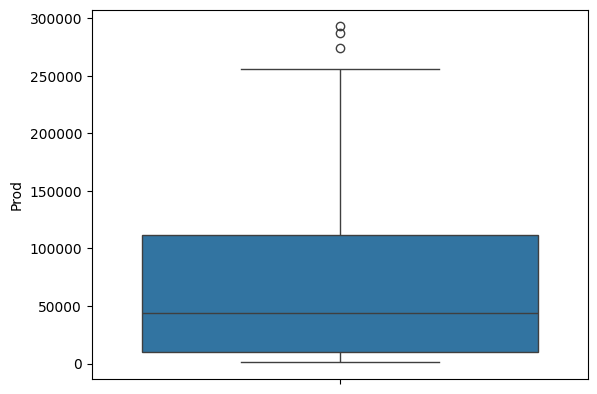

In [ ]:
sns.boxplot(complete_df['Prod'])

In [ ]:
complete_outlier(complete_df,'Prod')
complete_outlier(complete_south,'Prod')
complete_outlier(complete_west,'Prod')
complete_outlier(complete_northeast,'Prod')
complete_outlier(complete_central ,'Prod')
complete_outlier(complete_east,'Prod')
complete_outlier(complete_north,'Prod')

<ipython-input-7842-5bcc6bc327bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-7841-a9c4cecadf4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


<Axes: ylabel='Prod'>

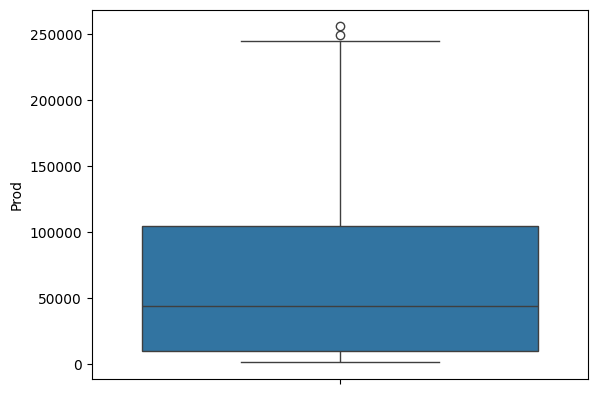

In [ ]:
sns.boxplot(complete_df['Prod'])

### **Outlier Max&Min Rain**

#### **Outlier Max&Min Rain**

<Axes: ylabel='MaxRain'>

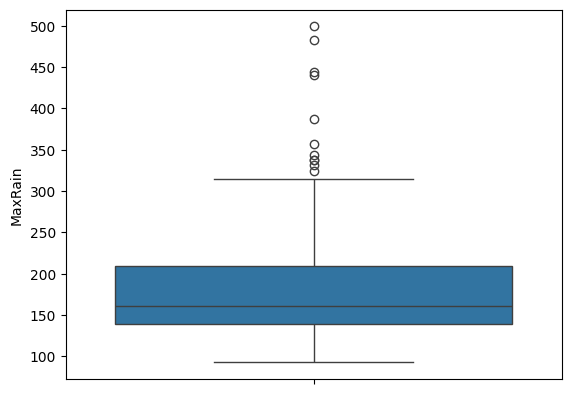

In [ ]:
sns.boxplot(complete_df['MaxRain'])

In [ ]:
complete_outlier(complete_df,'MaxRain')
complete_outlier(complete_south,'MaxRain')
complete_outlier(complete_west,'MaxRain')
complete_outlier(complete_northeast,'MaxRain')
complete_outlier(complete_central ,'MaxRain')
complete_outlier(complete_east,'MaxRain')
complete_outlier(complete_north,'MaxRain')

<ipython-input-7842-5bcc6bc327bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-7841-a9c4cecadf4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


<Axes: ylabel='MaxRain'>

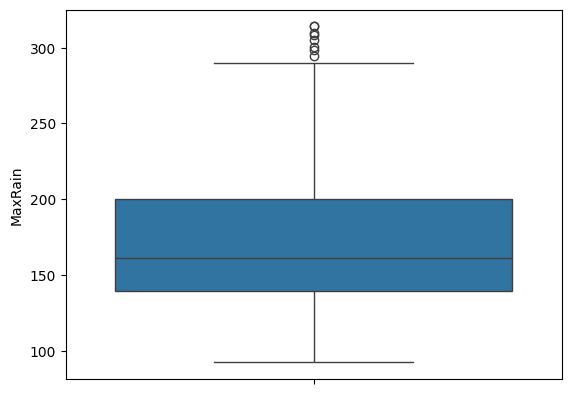

In [ ]:
sns.boxplot(complete_df['MaxRain'])

#### **Outlier Max&Min Rain**

<Axes: ylabel='MinRain'>

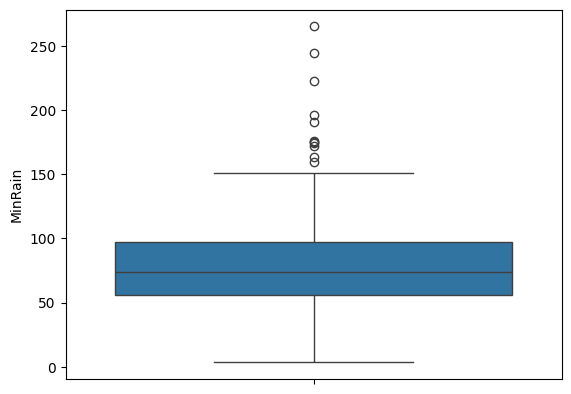

In [ ]:
sns.boxplot(complete_df['MinRain'])

In [ ]:
complete_outlier(complete_df,'MaxRain')
complete_outlier(complete_south,'MinRain')
complete_outlier(complete_west,'MinRain')
complete_outlier(complete_northeast,'MinRain')
complete_outlier(complete_central ,'MinRain')
complete_outlier(complete_east,'MinRain')
complete_outlier(complete_north,'MinRain')

<ipython-input-7842-5bcc6bc327bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-7841-a9c4cecadf4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


<Axes: ylabel='MinRain'>

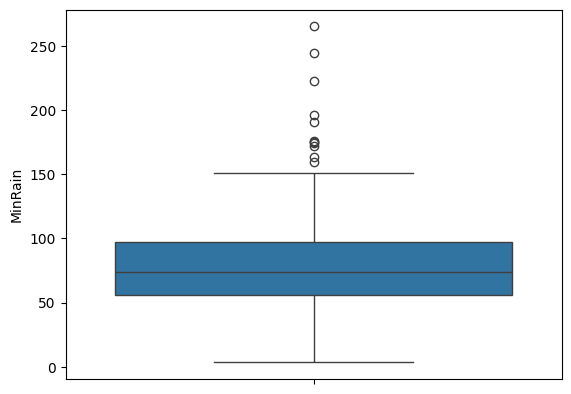

In [ ]:
sns.boxplot(complete_df['MinRain'])

### **Outlier Max&Min Temp**

#### **Outlier Max Temp**

<Axes: ylabel='Tmax'>

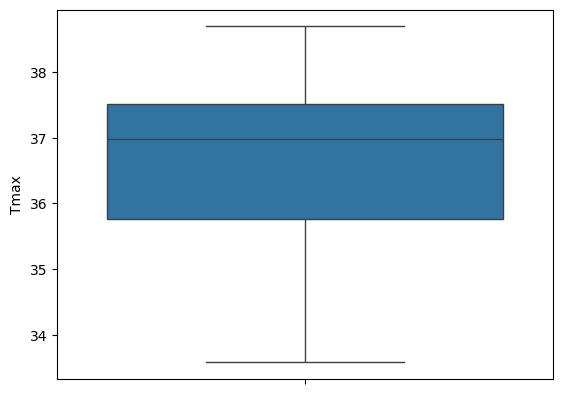

In [ ]:
sns.boxplot(complete_df['Tmax'])

In [ ]:
complete_outlier(complete_df,'Tmax')
complete_outlier(complete_south,'Tmax')
complete_outlier(complete_west,'Tmax')
complete_outlier(complete_northeast,'Tmax')
complete_outlier(complete_central ,'Tmax')
complete_outlier(complete_east,'Tmax')
complete_outlier(complete_north,'Tmax')

<ipython-input-7842-5bcc6bc327bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-7841-a9c4cecadf4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


<Axes: ylabel='Tmax'>

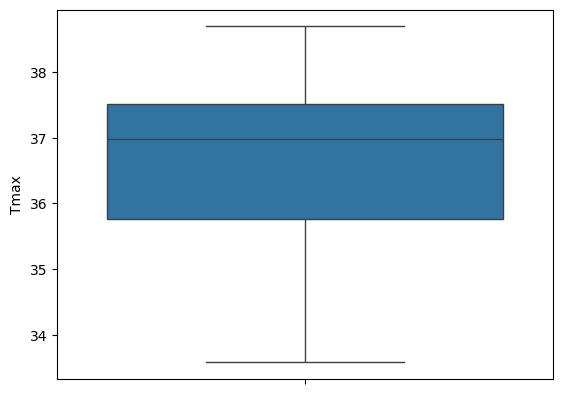

In [ ]:
sns.boxplot(complete_df['Tmax'])

#### **Outlier Min Temp**

<Axes: ylabel='Tmin'>

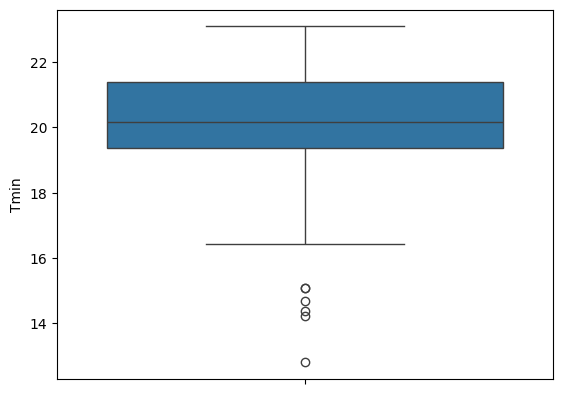

In [ ]:
sns.boxplot(complete_df['Tmin'])

In [ ]:
complete_outlier(complete_df,'Tmin')
complete_outlier(complete_south,'Tmin')
complete_outlier(complete_west,'Tmin')
complete_outlier(complete_northeast,'Tmin')
complete_outlier(complete_central ,'Tmin')
complete_outlier(complete_east,'Tmin')
complete_outlier(complete_north,'Tmin')

<ipython-input-7842-5bcc6bc327bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].mask((df[col] > upper) | (df[col] < lower), np.nan)
<ipython-input-7841-a9c4cecadf4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col].fillna(mean_value, inplace=True)


<Axes: ylabel='Tmin'>

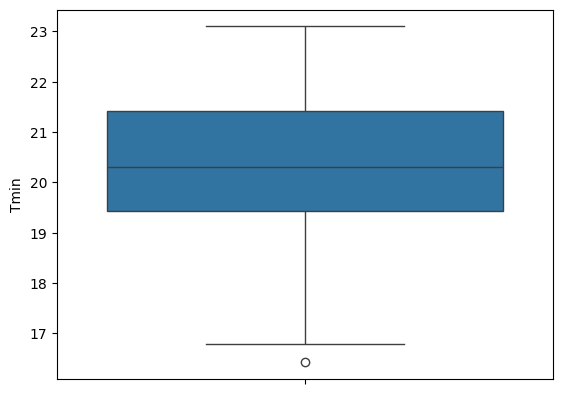

In [ ]:
sns.boxplot(complete_df['Tmin'])

## **หาความสัมพันธ์ของข้อมูลระหว่าง Features**

In [ ]:
complete_df.corr()

Prod  HarvArea   MaxRain   MinRain      Tmax      Tmin
Prod      1.000000  0.909134  0.391095  0.467759 -0.538852  0.127643
HarvArea  0.909134  1.000000  0.413531  0.460953 -0.537820  0.175796
MaxRain   0.391095  0.413531  1.000000  0.532836 -0.502103  0.358433
MinRain   0.467759  0.460953  0.532836  1.000000 -0.725936  0.410708
Tmax     -0.538852 -0.537820 -0.502103 -0.725936  1.000000 -0.416981
Tmin      0.127643  0.175796  0.358433  0.410708 -0.416981  1.000000

In [ ]:
complete_south.corr()

Prod  HarvArea   MaxRain   MinRain      Tmax      Tmin
Prod      1.000000  0.997084 -0.176359 -0.189415  0.081428  0.129552
HarvArea  0.997084  1.000000 -0.175350 -0.153550  0.045263  0.109916
MaxRain  -0.176359 -0.175350  1.000000  0.258999 -0.487635  0.181892
MinRain  -0.189415 -0.153550  0.258999  1.000000 -0.381971 -0.317039
Tmax      0.081428  0.045263 -0.487635 -0.381971  1.000000 -0.053745
Tmin      0.129552  0.109916  0.181892 -0.317039 -0.053745  1.000000

In [ ]:
complete_west.corr()

Prod  HarvArea   MaxRain   MinRain      Tmax      Tmin
Prod      1.000000  0.997019  0.557531 -0.035175  0.084615 -0.520851
HarvArea  0.997019  1.000000  0.575382 -0.000393  0.064564 -0.512194
MaxRain   0.557531  0.575382  1.000000  0.319831  0.323815 -0.766654
MinRain  -0.035175 -0.000393  0.319831  1.000000 -0.424260 -0.059056
Tmax      0.084615  0.064564  0.323815 -0.424260  1.000000 -0.654942
Tmin     -0.520851 -0.512194 -0.766654 -0.059056 -0.654942  1.000000

In [ ]:
complete_northeast.corr()

Prod  HarvArea   MaxRain   MinRain      Tmax      Tmin
Prod      1.000000  0.997311  0.387391  0.235960 -0.028641 -0.216359
HarvArea  0.997311  1.000000  0.375537  0.252444 -0.005841 -0.206114
MaxRain   0.387391  0.375537  1.000000  0.377582 -0.292074 -0.073286
MinRain   0.235960  0.252444  0.377582  1.000000 -0.075581 -0.039692
Tmax     -0.028641 -0.005841 -0.292074 -0.075581  1.000000  0.180048
Tmin     -0.216359 -0.206114 -0.073286 -0.039692  0.180048  1.000000

In [ ]:
complete_central.corr()

Prod  HarvArea   MaxRain   MinRain      Tmax      Tmin
Prod      1.000000  0.177512  0.292326  0.352205  0.064384 -0.786534
HarvArea  0.177512  1.000000 -0.070317  0.119513 -0.618987 -0.121515
MaxRain   0.292326 -0.070317  1.000000  0.846885 -0.121910 -0.165735
MinRain   0.352205  0.119513  0.846885  1.000000 -0.411846 -0.207621
Tmax      0.064384 -0.618987 -0.121910 -0.411846  1.000000 -0.133008
Tmin     -0.786534 -0.121515 -0.165735 -0.207621 -0.133008  1.000000

In [ ]:
complete_east.corr()

Prod  HarvArea   MaxRain   MinRain      Tmax      Tmin
Prod      1.000000  0.996242  0.433991  0.292475 -0.787429  0.368827
HarvArea  0.996242  1.000000  0.405533  0.323892 -0.768469  0.349508
MaxRain   0.433991  0.405533  1.000000  0.492038 -0.762603  0.439800
MinRain   0.292475  0.323892  0.492038  1.000000 -0.355274  0.062296
Tmax     -0.787429 -0.768469 -0.762603 -0.355274  1.000000 -0.478342
Tmin      0.368827  0.349508  0.439800  0.062296 -0.478342  1.000000

In [ ]:
complete_north.corr()

Prod  HarvArea   MaxRain   MinRain      Tmax      Tmin
Prod      1.000000  0.991971  0.053499  0.114513 -0.599166 -0.420470
HarvArea  0.991971  1.000000  0.062249  0.117254 -0.537830 -0.427350
MaxRain   0.053499  0.062249  1.000000  0.639165 -0.075635 -0.092246
MinRain   0.114513  0.117254  0.639165  1.000000 -0.219879  0.097889
Tmax     -0.599166 -0.537830 -0.075635 -0.219879  1.000000  0.546484
Tmin     -0.420470 -0.427350 -0.092246  0.097889  0.546484  1.000000

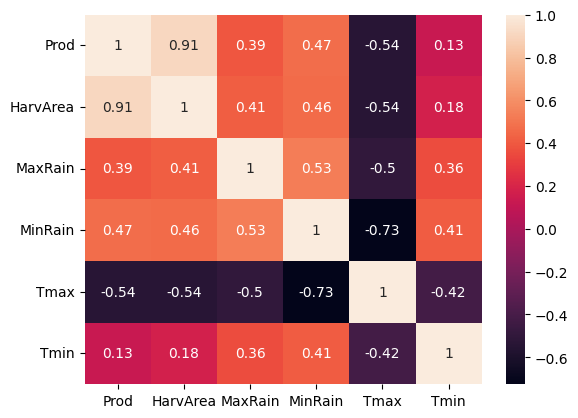

In [ ]:
sns.heatmap(complete_df.corr(), annot=True)
plt.show()

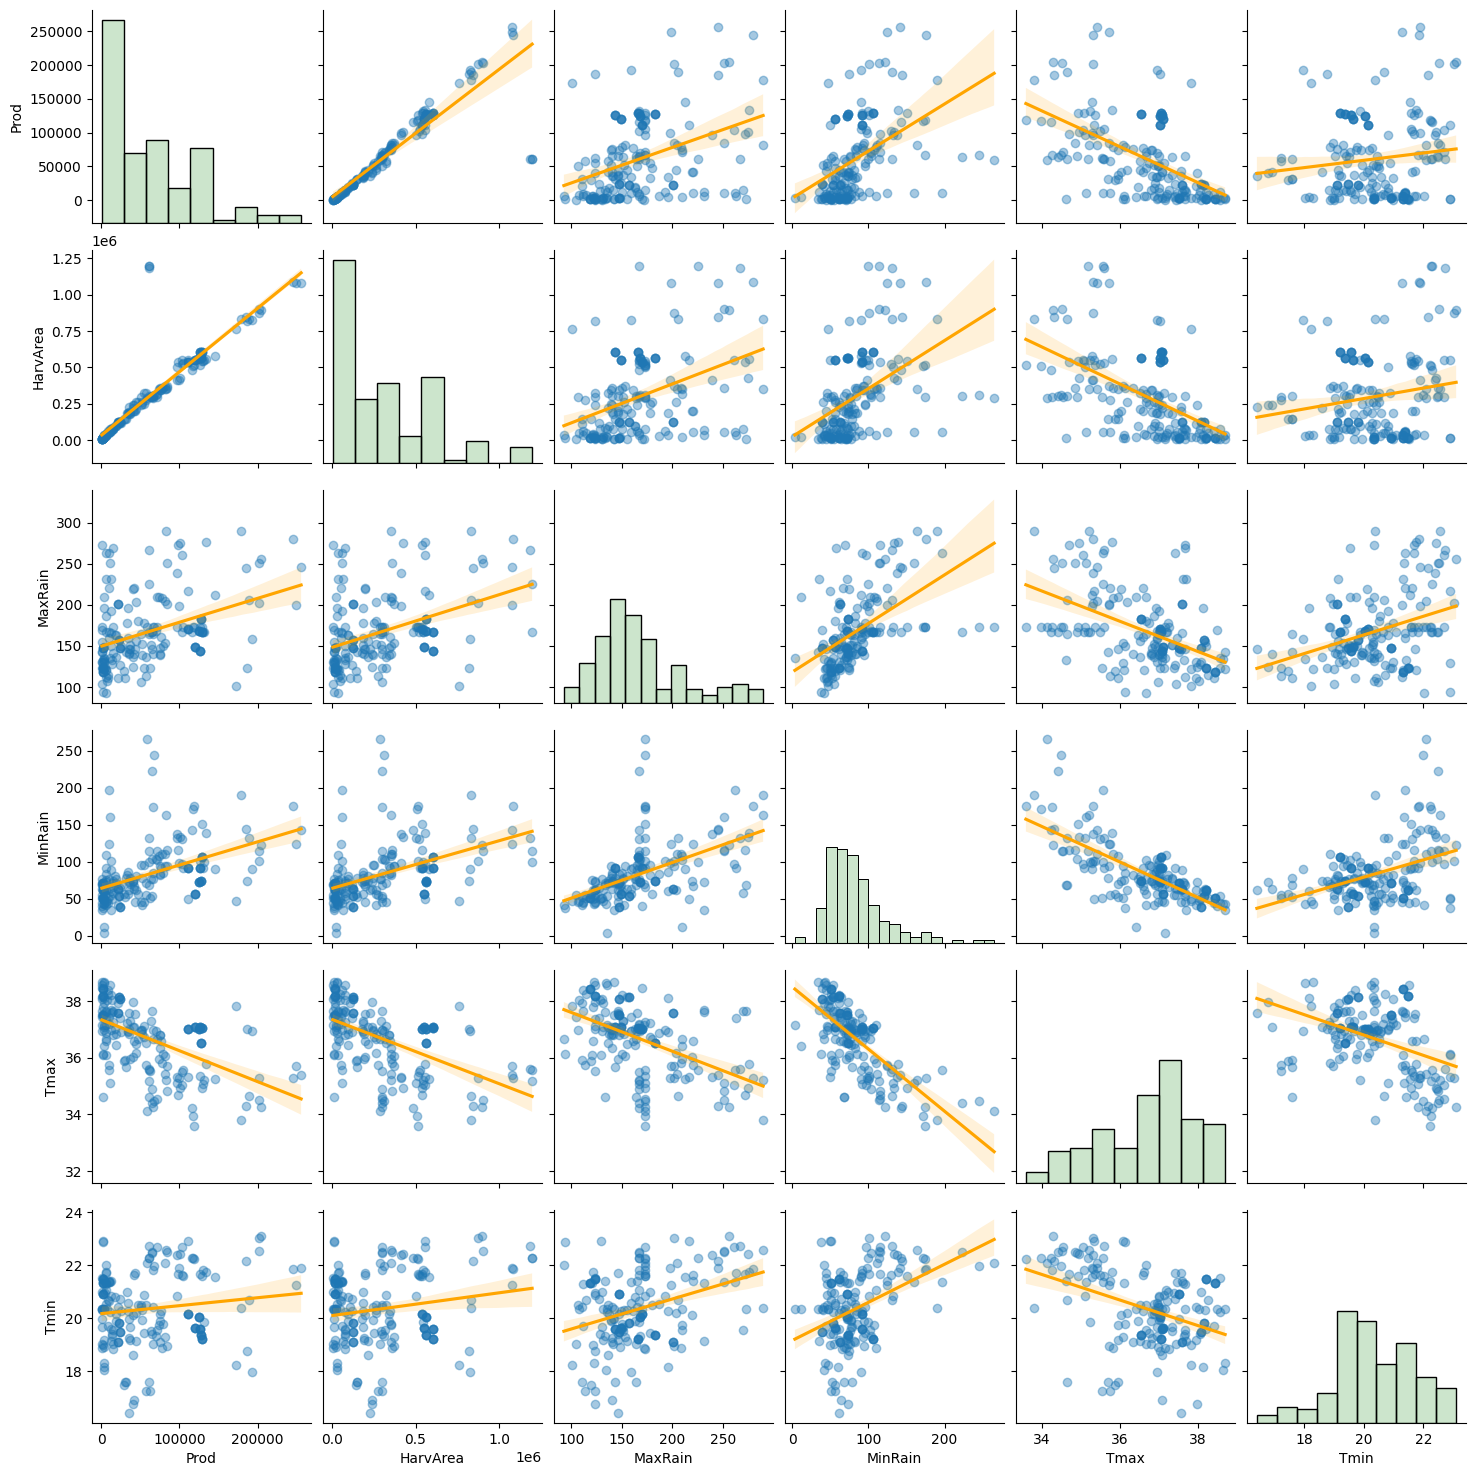

In [ ]:
sns.pairplot(complete_df,
             kind='reg',
             plot_kws={'scatter_kws': {'alpha': 0.4},
                       'line_kws': {'color': 'orange'}},
             diag_kws={'color': 'green', 'alpha':.2});

## **การแบ่งชุดข้อมูลออกเป็นชุดฝึกอบรมและชุดทดสอบ (Split data into training and testing sets)**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
complete_df.shape

(187, 6)

In [ ]:
complete_all = complete_df

In [ ]:
Xa = complete_all[['HarvArea','MaxRain','MinRain','Tmax','Tmin']]  # Features
ya = complete_all['Prod'] # target

In [ ]:
Xs =complete_south[['HarvArea','MaxRain','MinRain','Tmax','Tmin']]  # Features
ys = complete_south['Prod'] # target

In [ ]:
Xw = complete_west[['HarvArea','MaxRain','MinRain','Tmax','Tmin']]  # Features
yw = complete_west['Prod'] # target

In [ ]:
Xne = complete_northeast[['HarvArea','MaxRain','MinRain','Tmax','Tmin']]  # Features
yne = complete_northeast['Prod'] # target

In [ ]:
Xc = complete_central[['HarvArea','MaxRain','MinRain','Tmax','Tmin']]  # Features
yc = complete_central['Prod'] # target

In [ ]:
Xe = complete_east[['HarvArea','MaxRain','MinRain','Tmax','Tmin']]  # Features
ye = complete_east['Prod'] # target

In [ ]:
Xn = complete_north[['HarvArea','MaxRain','MinRain','Tmax','Tmin']]  # Features
yn = complete_north['Prod'] # target

In [ ]:
complete_df = complete_northeast

In [ ]:
X = complete_df[['HarvArea','MaxRain','MinRain','Tmax','Tmin']]  # Features
y = complete_df['Prod'] # target

In [ ]:
X

HarvArea     MaxRain     MinRain       Tmax       Tmin
12   183073.0  151.419166   77.972499  37.316667  19.683333
13   190532.0  140.431669   73.299167  36.825000  19.258333
14   189589.0  146.118334   70.275832  36.939103  19.175000
18    79695.0  128.522502   49.444167  36.939103  19.400000
19    80798.0  133.289168   71.663332  36.939103  19.325000
..        ...         ...         ...        ...        ...
212  605294.0  143.596669   91.146668  37.083333  19.591667
213  603683.0  166.239998  106.553332  37.041667  19.225000
214  539475.0  170.051669   91.700833  37.033333  20.150000
215  605294.0  143.596669   91.146668  37.083333  19.591667
216  603683.0  166.239998  106.553332  37.041667  19.225000

[66 rows x 5 columns]

In [ ]:
y

12      36658.0
13      36142.0
14      37563.0
18      14206.0
19      14500.0
         ...   
212    125816.0
213    129299.0
214    111201.0
215    125816.0
216    129299.0
Name: Prod, Length: 66, dtype: float64

In [ ]:
# แบ่งชุดข้อมูลฝึกสอน 80% และ ชุดข้อมูลทดสอบ 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(52, 5)
(14, 5)
(52,)
(14,)


## **การสร้างโมเดลจำลอง**

## **K-Nearest Neighbors Regression (KNN-R)**
หลักการทำงานของ KNN-R

เลือกค่า K: กำหนดค่า K ที่ต้องการ ซึ่งเป็นจำนวนขอข้อมูลที่ใกล้ที่สุดที่จะใช้ในการตัดสินใจ
คำนวนระยะทาง: เพื่อคำนวณระยะทางระหว่างชุดข้อมูลทดสอบกับชุดข้อมูลฝึกฝน โดยใช้สมการคำนวณระยะทาง Distance
หาข้อมูลที่ใกล้ที่สุด:

1.   เลือกค่า K: กำหนดค่า K ที่ต้องการ ซึ่งเป็นจำนวนขอข้อมูลที่ใกล้ที่สุดที่จะใช้ในการตัดสินใจ
2.   คำนวนระยะทาง: เพื่อคำนวณระยะทางระหว่างชุดข้อมูลทดสอบกับชุดข้อมูลฝึกฝน โดยใช้สมการคำนวณระยะทาง Distance
3.   หาข้อมูลที่ใกล้ที่สุด:




In [ ]:
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsRegressor

## **ทำ Normalization ข้อมูล (Normalization Data)**

In [ ]:
# นำเข้าไลบรารีที่จำเป็น
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


# มาตราส่วนข้อมูล
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# สร้างโมเดล KNN-R
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_scaled, y_train)

# ทำนายผลผลิต
y_pred = knn_regressor.predict(X_test_scaled)

# คำนวณค่า MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)


Mean Squared Error: 516487654.48285705


In [ ]:
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[2.11976459e-01, 4.49353204e-01, 5.31865286e-01, 8.36879433e-01,
        5.63106796e-01],
       [2.21112520e-01, 3.28302196e-01, 4.63410778e-01, 4.18439716e-01,
        3.98058252e-01],
       [2.19957498e-01, 3.90953093e-01, 4.19125270e-01, 5.15548282e-01,
        3.65695793e-01],
       [8.53552334e-02, 1.97097012e-01, 1.13985094e-01, 5.15548282e-01,
        4.53074434e-01],
       [8.67062289e-02, 2.49612128e-01, 4.39449226e-01, 5.15548282e-01,
        4.23948220e-01],
       [8.58525173e-02, 3.32249994e-01, 4.64668032e-01, 3.97163121e-01,
        3.10679612e-01],
       [1.23684065e-01, 0.00000000e+00, 0.00000000e+00, 5.15548282e-01,
        8.51132686e-01],
       [1.31360121e-01, 1.78349463e-01, 3.35058514e-01, 9.07801418e-01,
        9.64401294e-01],
       [1.32546988e-01, 4.26336545e-01, 3.91941239e-01, 4.82269504e-01,
        7.89644013e-01],
       [4.20176744e-01, 4.79978113e-01, 9.60584949e-01, 5.15548282e-01,
        5.85760518e-01],
       [4.24131743e-01, 3.2403

In [ ]:
X_test_scaled

array([[0.67576966, 0.63580024, 0.44984926, 0.58156028, 0.69902913],
       [0.67879378, 0.79950606, 0.46660891, 0.16312057, 0.44012945],
       [0.6485109 , 0.65463046, 0.73295656, 0.59574468, 0.74433657],
       [0.72912847, 0.36317151, 0.72483921, 0.63829787, 0.52750809],
       [0.72715525, 0.61263667, 0.9505145 , 0.60283688, 0.38511327],
       [0.6485109 , 0.65463046, 0.73295656, 0.59574468, 0.74433657],
       [0.72912847, 0.36317151, 0.72483921, 0.63829787, 0.52750809],
       [0.72715525, 0.61263667, 0.9505145 , 0.60283688, 0.38511327],
       [0.6485109 , 0.65463046, 0.73295656, 0.59574468, 0.74433657],
       [0.72912847, 0.36317151, 0.72483921, 0.63829787, 0.52750809],
       [0.72715525, 0.61263667, 0.9505145 , 0.60283688, 0.38511327],
       [0.6485109 , 0.65463046, 0.73295656, 0.59574468, 0.74433657],
       [0.72912847, 0.36317151, 0.72483921, 0.63829787, 0.52750809],
       [0.72715525, 0.61263667, 0.9505145 , 0.60283688, 0.38511327]])

In [ ]:
knnr = KNeighborsRegressor(n_neighbors = 8, metric='euclidean')
knnr.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=8)

Text(0.5, 1.0, 'ELBOW PLOT')

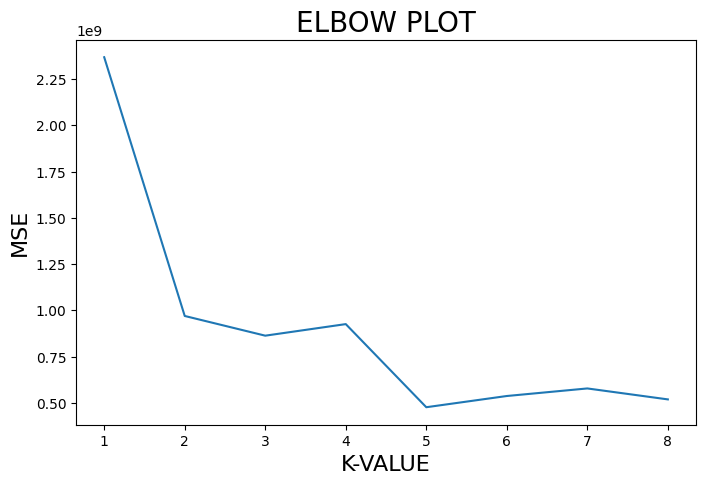

In [ ]:
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(figsize=(8,5))
k_list = np.arange(1, 9, 1)
knn_dict = {} # เพื่อเก็บค่า k และ MSE
for i in k_list:
    # สร้างโมเดล KNN-R ด้วยจำนวนเพื่อนบ้านเท่ากับ i
    knn = KNeighborsRegressor(n_neighbors=int(i))
    model_knn = knn.fit(X_train_scaled, y_train)
    y_knn_pred = model_knn.predict(X_test_scaled)
    # คำนวณค่า MSE
    mse = mean_squared_error(y_test, y_knn_pred)
    knn_dict[i] = mse

# พล็อตกราฟ ELBOW PLOT
ax.plot(knn_dict.keys(), knn_dict.values())
ax.set_xlabel('K-VALUE', fontsize=16)
ax.set_ylabel('MSE' ,fontsize=16)
ax.set_title('ELBOW PLOT' ,fontsize=20)


### การพยากรณ์ (Predictions)

ชุดข้อมูลฝึกฝน (Training Set)

In [ ]:
y_pred_train = knnr.predict(X_train)
y_pred_train

array([ 41729.875,  41729.875,  41729.875,  15429.   ,  15429.   ,
        15429.   ,  19570.375,  19570.375,  19570.375,  76988.375,
        76988.375,  76988.375,  15429.   ,  15429.   ,  15429.   ,
        69101.125,  63839.5  ,  63839.5  ,   9556.5  ,   9556.5  ,
         9556.5  ,  51230.375,  54924.375,  54924.375,  17031.875,
        17031.875,  17031.875, 148240.   , 148240.   , 148240.   ,
        76988.375,  75707.125,  76988.375,  76988.375,  78207.375,
        78207.375,  35046.75 ,  44193.25 ,  44193.25 ,  69101.125,
        69101.125,  69101.125, 122709.875, 124776.625, 124776.625,
       122709.875, 124776.625, 124776.625, 122709.875, 124776.625,
       124776.625, 122709.875])

ชุดข้อมูลทดสอบ (Test Set)

In [ ]:
y_pred_test = knnr.predict(X_test)
y_pred_test

array([124776.625, 124776.625, 122709.875, 124776.625, 124776.625,
       122709.875, 124776.625, 124776.625, 122709.875, 124776.625,
       124776.625, 122709.875, 124776.625, 124776.625])

In [ ]:
y_pred = knnr.predict(X)
y_pred

array([ 41729.875,  41729.875,  41729.875,  15429.   ,  15429.   ,
        15429.   ,  19570.375,  19570.375,  19570.375,  76988.375,
        76988.375,  76988.375,  15429.   ,  15429.   ,  15429.   ,
        69101.125,  63839.5  ,  63839.5  ,   9556.5  ,   9556.5  ,
         9556.5  ,  51230.375,  54924.375,  54924.375,  17031.875,
        17031.875,  17031.875, 148240.   , 148240.   , 148240.   ,
        76988.375,  75707.125,  76988.375,  76988.375,  78207.375,
        78207.375,  35046.75 ,  44193.25 ,  44193.25 ,  69101.125,
        69101.125,  69101.125, 122709.875, 124776.625, 124776.625,
       122709.875, 124776.625, 124776.625, 122709.875, 124776.625,
       124776.625, 122709.875, 124776.625, 124776.625, 122709.875,
       124776.625, 124776.625, 122709.875, 124776.625, 124776.625,
       122709.875, 124776.625, 124776.625, 122709.875, 124776.625,
       124776.625])

## **ชุดข้อมูล X (train+test)**

In [ ]:
complete_df['Predicted_Prod'] = knnr.predict(X)
complete_df

Prod  HarvArea     MaxRain     MinRain       Tmax       Tmin  \
12    36658.0  183073.0  151.419166   77.972499  37.316667  19.683333   
13    36142.0  190532.0  140.431669   73.299167  36.825000  19.258333   
14    37563.0  189589.0  146.118334   70.275832  36.939103  19.175000   
18    14206.0   79695.0  128.522502   49.444167  36.939103  19.400000   
19    14500.0   80798.0  133.289168   71.663332  36.939103  19.325000   
..        ...       ...         ...         ...        ...        ...   
212  125816.0  605294.0  143.596669   91.146668  37.083333  19.591667   
213  129299.0  603683.0  166.239998  106.553332  37.041667  19.225000   
214  111201.0  539475.0  170.051669   91.700833  37.033333  20.150000   
215  125816.0  605294.0  143.596669   91.146668  37.083333  19.591667   
216  129299.0  603683.0  166.239998  106.553332  37.041667  19.225000   

     Predicted_Prod  
12        41729.875  
13        41729.875  
14        41729.875  
18        15429.000  
19        15429.000  
..              ...  
212      124776.625  
213      124776.625  
214      122709.875  
215      124776.625  
216      124776.625  

[66 rows x 7 columns]

In [ ]:
absolute_dis_list = abs(y_pred - complete_df['Prod'])
result_df_knnr = pd.DataFrame({'y_pred': y_pred, 'complete_df_prod': complete_df['Prod'], 'absolute_difference': absolute_dis_list})

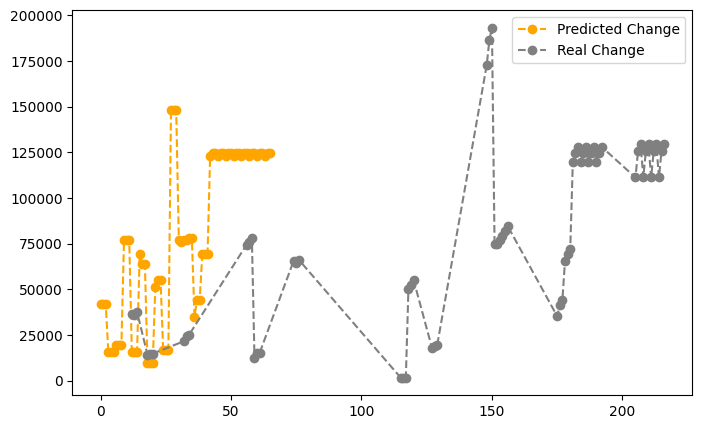

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred, label = 'Predicted Change',
         linestyle="--", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(complete_df['Prod'], label = 'Real Change',
         linestyle="--", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

## **การประเมินผลโมเดล (Model Evaluation)**

ชุดข้อมูลฝึกฝน (Training Set)

In [ ]:
KNNR_report = evaluate_model(y_train, y_pred_train, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: 0.96
Mean Square Error: 88456518.01
Root Mean Square Error: 9405.13



Text(0, 0.5, 'Actual')

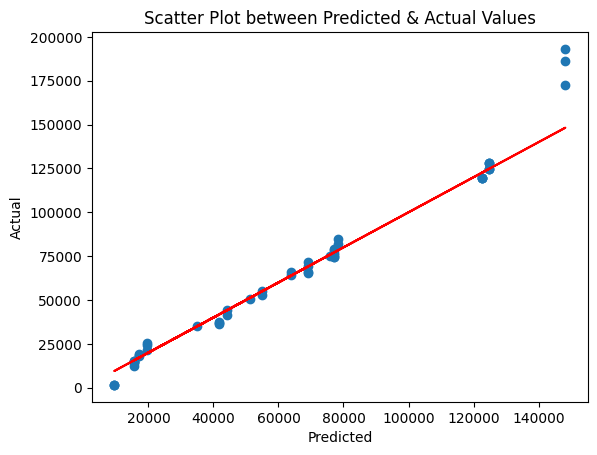

In [ ]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

ชุดข้อมูลทดสอบ (Test Set)

In [ ]:
evaluate_model(y_test, y_pred_test, 'K-Nearest Neighbors Regression')

Model: K-Nearest Neighbors Regression
R-squared: 0.19
Mean Square Error: 44753150.73
Root Mean Square Error: 6689.78



{'modelName': 'K-Nearest Neighbors Regression',
 'r2': 0.19158340331341028,
 'mse': 44753150.72991072,
 'rmse': 6689.779572595103}

Text(0, 0.5, 'Actual')

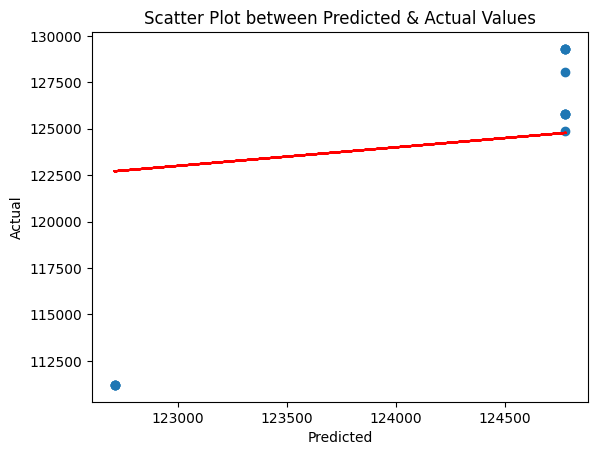

In [ ]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## **Multiple Linear Regression (MLR)**

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
# ค่าจุดตัดแกน Y ของสมการ
reg.intercept_

2864.272313255242

In [ ]:
# ค่าสัมประสิทธิ์การถดถอยของตัวตอบสนอง X
reg.coef_

array([ 2.29565343e-01,  3.17086772e+01,  1.57233701e+01, -4.37560151e+02,
        1.86511568e+02])

## **การพยากรณ์ (Predictions)**

ชุดข้อมูลฝึกฝน (Training Set)

In [ ]:
y_pred_train = reg.predict(X_train)
y_pred_train

array([ 38261.66339209,  39687.97807469,  39538.80821169,  13467.43493287,
        14207.16196433,  14318.53333099,  20152.77521575,  22317.15973387,
        23449.25347389,  78008.0653753 ,  78054.78820214,  78690.83228501,
        12009.09470048,  14445.33630841,  13620.71920564,  64800.7166757 ,
        64018.33059031,  63276.77403175,  -1153.46629252,  -1780.41116353,
        -1990.63538526,  53153.02186423,  52806.03080306,  54796.11258007,
        19265.58182267,  18508.37024248,  19442.03913643, 170663.81803325,
       182916.38857416, 186542.22658995,  75496.39995275,  75362.35236948,
        76350.7502459 ,  78225.91775392,  82287.37821657,  83936.3144616 ,
        37324.94364519,  45569.41448891,  46588.19674676,  65294.62844574,
        69174.5707413 ,  69331.58560746, 122947.23292668, 125833.31339085,
       126980.05764508, 122947.23292668, 125833.31339085, 126980.05764508,
       122947.23292668, 125833.31339085, 126980.05764508, 122947.23292668])

## **ชุดข้อมูลทดสอบ (Test Set)**

In [ ]:
y_pred_test = reg.predict(X_test)
y_pred_test

array([125833.31339085, 126980.05764508, 121096.89270211, 135233.07401101,
       135773.32304158, 121096.89270211, 135233.07401101, 135773.32304158,
       121096.89270211, 135233.07401101, 135773.32304158, 121096.89270211,
       135233.07401101, 135773.32304158])

# **ชุดข้อมูล X (train+test)**

In [ ]:
y_pred = reg.predict(X)
y_pred

array([ 38261.66339209,  39687.97807469,  39538.80821169,  13467.43493287,
        14207.16196433,  14318.53333099,  20152.77521575,  22317.15973387,
        23449.25347389,  78008.0653753 ,  78054.78820214,  78690.83228501,
        12009.09470048,  14445.33630841,  13620.71920564,  64800.7166757 ,
        64018.33059031,  63276.77403175,  -1153.46629252,  -1780.41116353,
        -1990.63538526,  53153.02186423,  52806.03080306,  54796.11258007,
        19265.58182267,  18508.37024248,  19442.03913643, 170663.81803325,
       182916.38857416, 186542.22658995,  75496.39995275,  75362.35236948,
        76350.7502459 ,  78225.91775392,  82287.37821657,  83936.3144616 ,
        37324.94364519,  45569.41448891,  46588.19674676,  65294.62844574,
        69174.5707413 ,  69331.58560746, 122947.23292668, 125833.31339085,
       126980.05764508, 122947.23292668, 125833.31339085, 126980.05764508,
       122947.23292668, 125833.31339085, 126980.05764508, 122947.23292668,
       125833.31339085, 1

In [ ]:
absolute_dis_list = abs(y_pred - complete_df['Prod'])
result_df_mlr = pd.DataFrame({'y_pred': y_pred, 'complete_df_prod': complete_df['Prod'], 'absolute_difference': absolute_dis_list})

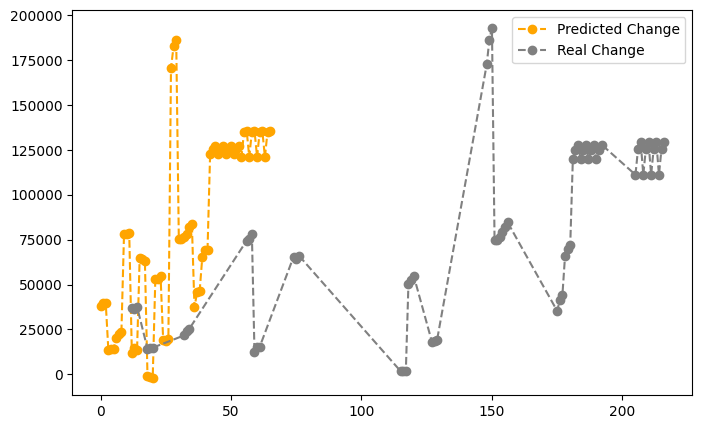

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(y_pred, label = 'Predicted Change', linestyle="--", marker='o', color='orange') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(complete_df['Prod'], label = 'Real Change', linestyle="--", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง
plt.legend()

# **การประเมินผลโมเดล (Model Evaluation)**

# **ชุดข้อมูลฝึกฝน (Training Set)**

In [ ]:
MLR_report = evaluate_model(y_train, y_pred_train, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: 1.0
Mean Square Error: 4724069.46
Root Mean Square Error: 2173.49



Text(0, 0.5, 'Actual')

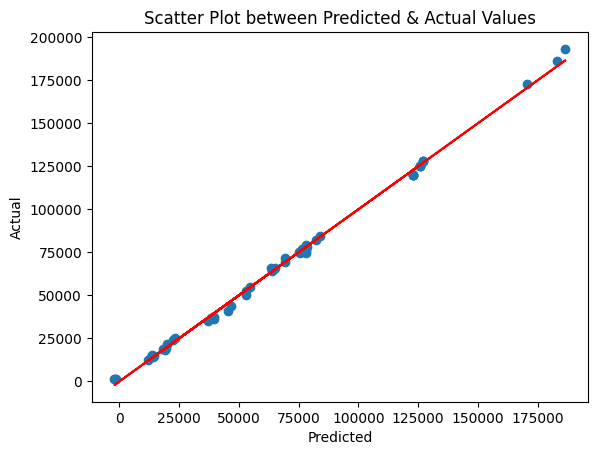

In [ ]:
plt.scatter(y_pred_train, y_train)

plt.plot(y_pred_train, y_pred_train, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

 **ชุดข้อมูลทดสอบ (Test Set)**

In [ ]:
evaluate_model(y_test, y_pred_test, 'Multiple Linear Regression')

Model: Multiple Linear Regression
R-squared: -0.18
Mean Square Error: 65439384.63
Root Mean Square Error: 8089.46



{'modelName': 'Multiple Linear Regression',
 'r2': -0.182090729971627,
 'mse': 65439384.63371229,
 'rmse': 8089.461331492493}

Text(0, 0.5, 'Actual')

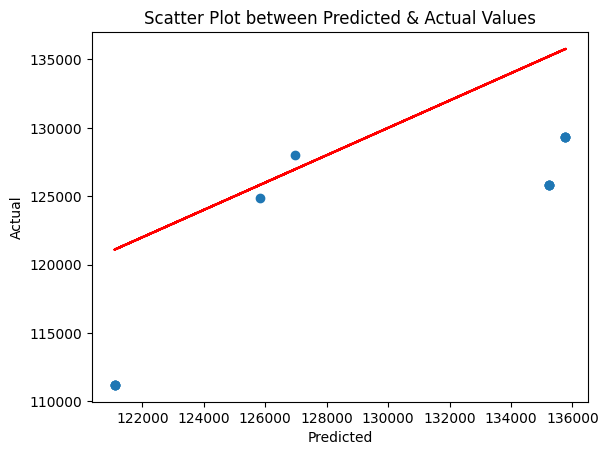

In [ ]:
plt.scatter(y_pred_test, y_test)

plt.plot(y_pred_test, y_pred_test, color='red')

plt.title('Scatter Plot between Predicted & Actual Values')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## **บทสรุปสุดท้ายและการเปรียบเทียบ**

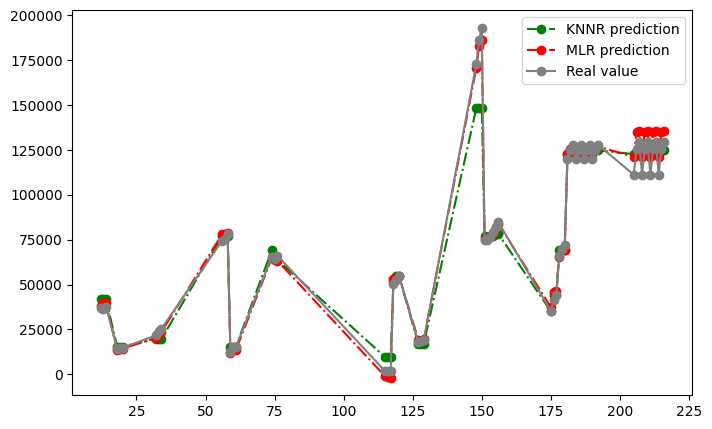

In [ ]:
plt.figure(figsize = (8, 5))
plt.plot(result_df_knnr['y_pred'], label = 'KNNR prediction', linestyle="-.",marker='o', color='green') # การเปลี่ยนแปลงที่คาดการณ์ไว้
plt.plot(result_df_mlr['y_pred'], label = 'MLR prediction', linestyle="-.",marker='o', color='red') # การเปลี่ยนแปลงที่แท้จริง)
plt.plot(complete_df['Prod'], label = 'Real value', linestyle="-", marker='o', color='grey') # การเปลี่ยนแปลงที่แท้จริง)
plt.legend()

In [ ]:
KNNR_report['modelName']

'K-Nearest Neighbors Regression'

In [ ]:
def print_rep(report) :
  print('Model :', report['modelName'])
  print('R2 :', round(report['r2'], 2))
  print('MSE :', round(report['mse'], 2))
  print('RMSE :', round(report['rmse'], 2))

print_rep(KNNR_report)
print('--------------------------------------')
print_rep(MLR_report)

Model : K-Nearest Neighbors Regression
R2 : 0.96
MSE : 88456518.01
RMSE : 9405.13
--------------------------------------
Model : Multiple Linear Regression
R2 : 1.0
MSE : 4724069.46
RMSE : 2173.49
